52100196 - Nguyễn Thị Mỹ Hân
52100331 - Nguyễn Hữu Toàn
52100341 - Trịnh Ngọc Trung Trực

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_val_score

Câu 1. Phân tích thống kê trên dữ liệu, vẽ các đồ thị để hiểu bài toán, hiểu dữ liệu. Tìm hiểu các đặc trưng và đánh gía vai trò của các đặc trưng đối với mục tiêu bài toán

In [36]:
df = pd.read_csv('data_cleaned_2021.csv')
draw=df
draw = draw.drop(["index","Job Description"],axis=1)
styled_draw = draw.head(2)

In [37]:
print("No. of rows in the dataset:",draw.shape[0])
print("No. of columns in the dataset:",draw.shape[1])

No. of rows in the dataset: 742
No. of columns in the dataset: 40


In [38]:
#get some information about our Data-Set
draw.info()
draw.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           742 non-null    object 
 1   Salary Estimate     742 non-null    object 
 2   Rating              742 non-null    float64
 3   Company Name        742 non-null    object 
 4   Location            742 non-null    object 
 5   Headquarters        742 non-null    object 
 6   Size                742 non-null    object 
 7   Founded             742 non-null    int64  
 8   Type of ownership   742 non-null    object 
 9   Industry            742 non-null    object 
 10  Sector              742 non-null    object 
 11  Revenue             742 non-null    object 
 12  Competitors         742 non-null    object 
 13  Hourly              742 non-null    int64  
 14  Employer provided   742 non-null    int64  
 15  Lower Salary        742 non-null    int64  
 16  Upper Sa

,count,mean,std,min,25%,50%,75%,max
Rating,742.0,3.618868,0.801210,-1.0,3.3,3.7,4.0,5.0
Founded,742.0,1837.154987,497.183763,-1.0,1939.0,1988.0,2007.0,2019.0
Hourly,742.0,0.032345,0.177034,0.0,0.0,0.0,0.0,1.0
Employer provided,742.0,0.022911,0.149721,0.0,0.0,0.0,0.0,1.0
Lower Salary,742.0,74.754717,30.945892,15.0,52.0,69.5,91.0,202.0
Upper Salary,742.0,128.214286,45.128650,16.0,96.0,124.0,155.0,306.0
Avg Salary(K),742.0,101.484501,37.482449,15.5,73.5,97.5,122.5,254.0
Age,742.0,47.524259,53.839080,-1.0,12.0,25.0,60.0,277.0
Python,742.0,0.528302,0.499535,0.0,0.0,1.0,1.0,1.0
spark,742.0,0.225067,0.417908,0.0,0.0,0.0,0.0,1.0


In [39]:
draw.columns

Index(['Job Title', 'Salary Estimate', 'Rating', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'Hourly', 'Employer provided',
       'Lower Salary', 'Upper Salary', 'Avg Salary(K)', 'company_txt',
       'Job Location', 'Age', 'Python', 'spark', 'aws', 'excel', 'sql', 'sas',
       'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi',
       'flink', 'mongo', 'google_an', 'job_title_sim', 'seniority_by_title',
       'Degree'],
      dtype='object')

In [40]:
draw.isnull().sum()

Job Title             0
Salary Estimate       0
Rating                0
Company Name          0
Location              0
Headquarters          0
Size                  0
Founded               0
Type of ownership     0
Industry              0
Sector                0
Revenue               0
Competitors           0
Hourly                0
Employer provided     0
Lower Salary          0
Upper Salary          0
Avg Salary(K)         0
company_txt           0
Job Location          0
Age                   0
Python                0
spark                 0
aws                   0
excel                 0
sql                   0
sas                   0
keras                 0
pytorch               0
scikit                0
tensor                0
hadoop                0
tableau               0
bi                    0
flink                 0
mongo                 0
google_an             0
job_title_sim         0
seniority_by_title    0
Degree                0
dtype: int64

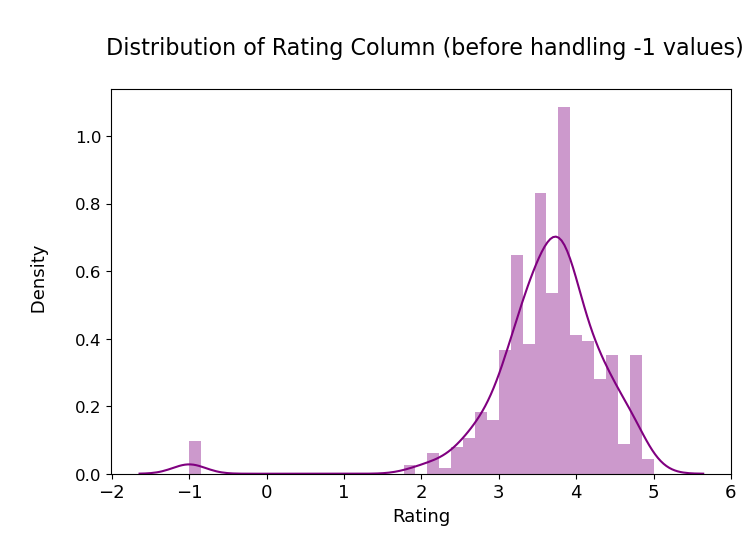

In [41]:
# Lets look at how the 'Rating' column is distributed:

plt.figure(figsize=(8,5))
plt.title('\n Distribution of Rating Column (before handling -1 values)\n', size=16, color='black')
plt.xlabel('\n Rating \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.distplot(draw.Rating,color="purple")
plt.show()

In [8]:
# Giá trị -1 có thể là một giá trị được chọn để biểu diễn dữ liệu bị thiếu (missing data) hoặc giá trị ngoại lệ. Thay thế giá trị -1 bằng giá trị trung bình của phân phối có thể giúp loại bỏ ảnh hưởng của giá trị ngoại lệ đối với mô hình. Việc thay thế giá trị -1 giúp chuẩn hóa dữ liệu, tạo ra một phân phối gần với phân phối chuẩn. 

In [42]:
# Replacing the -1 values in 'Rating' column with nan value.

draw["Rating"] = draw["Rating"].apply(lambda x: np.nan if x==-1 else x)

# Fill missing values with the mean of the distribution.

draw["Rating"] = draw["Rating"].fillna(draw["Rating"].mean())

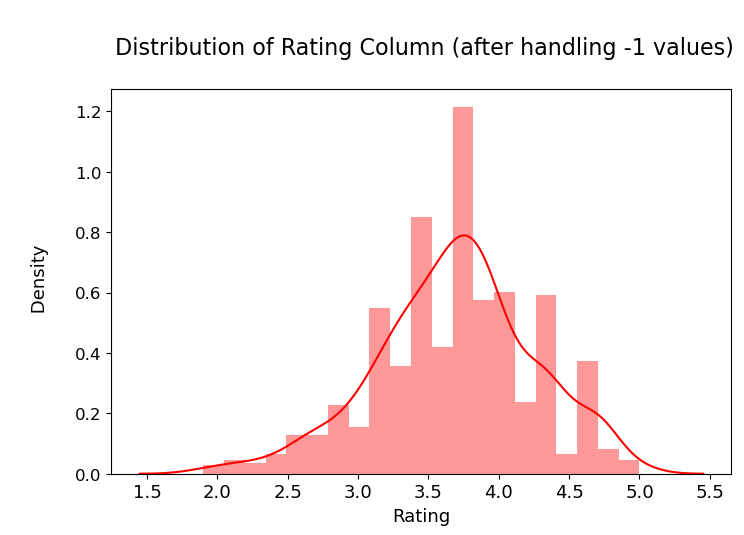

In [43]:
# Verifying that the replace function worked properly for the 'Rating' column.

plt.figure(figsize=(8,5))
plt.title('\n Distribution of Rating Column (after handling -1 values)\n', size=16, color='black')
plt.xlabel('\n Rating \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.distplot(draw["Rating"],kde=True,color="red")
plt.show()

In [ ]:
# Hầu hết các công ty được đánh giá từ 3,5 - 4 (~3,7).

<Figure size 800x500 with 0 Axes>

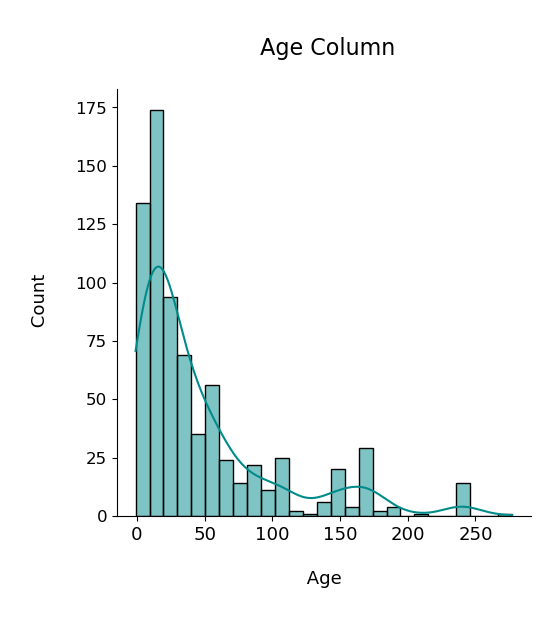

In [44]:
# Looking at the 'Age' column.

plt.figure(figsize=(8,5))
a = sns.displot(draw.Age,kde=True,color="darkcyan")
plt.title('\n Age Column\n', size=16, color='black')
plt.xlabel('\n Age \n', fontsize=13, color='black')
plt.ylabel('\n Count\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# Nó cho thấy có nhiều ngoại lệ trong cột Tuổi, vì vậy giá trị trung bình của Tuổi không thể tin cậy được vì nó rõ ràng sẽ thiên về các ngoại lệ

In [45]:
# Importing the dataset and dropping columns that is not needed.
#I changed a column name from "State" to "Job Location" because this will help me in merging the two dataframes together.
draw2 = pd.read_csv("statelatlong.csv").rename(columns={"State":"Job Location"})
#Dropping the \column that is not required.
draw2 = draw2.drop("City",axis=1)
#Looking at first few records.
draw2.head(5)

,Job Location,Latitude,Longitude
0,AL,32.601011,-86.680736
1,AK,61.302501,-158.775020
2,AZ,34.168219,-111.930907
3,AR,34.751928,-92.131378
4,CA,37.271875,-119.270415


In [46]:
%pip install geopandas --quiet #installing Geopandas library quitly i.e. without any output

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#installing'


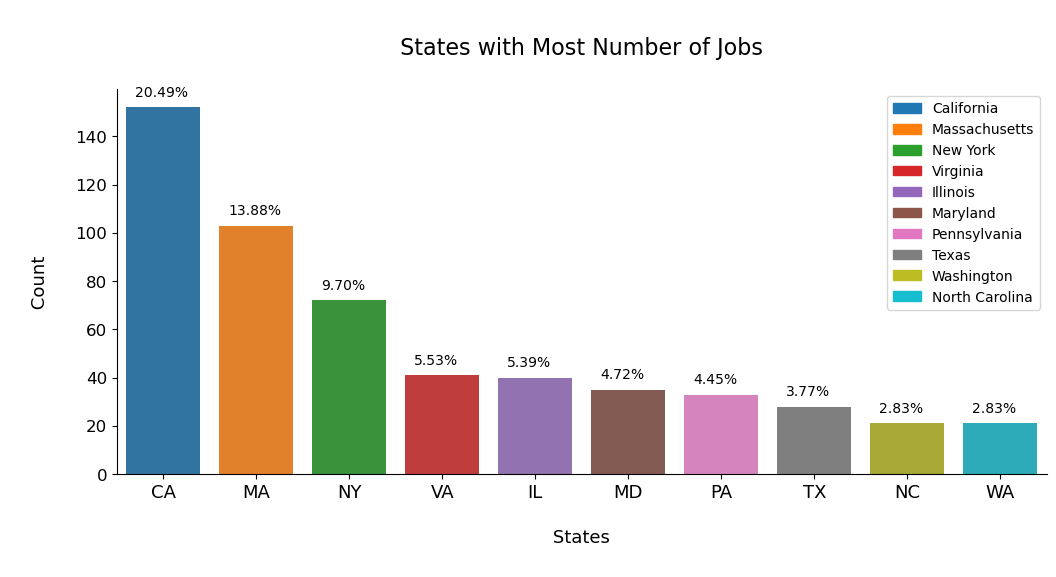

In [47]:
import matplotlib.pyplot as plt
import matplotlib as mat

import seaborn as sns
from IPython.core.pylabtools import figsize
from matplotlib import rcParams

# Assume lab là danh sách chứa các nhãn
lab = ["California", "Massachusetts", "New York", "Virginia", "Illinois", "Maryland", "Pennsylvania", "Texas", "Washington", "North Carolina"]

# figure size in inches
rcParams['figure.figsize'] = 12, 5

# Lets look at the top 10 states with the most number of job postings.
fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x=draw["Job Location"].value_counts().index[0:10], y=draw["Job Location"].value_counts()[0:10], palette=sns.color_palette())

# Removing top and Right borders
sns.despine(bottom=False, left=False)

# Putting % on the bar plot.
spots = draw["Job Location"].value_counts().index[0:10]
for p in ax.patches:
    ax.text(p.get_x() + 0.1, p.get_height() + 4.5, '{:.2f}%'.format((p.get_height() / 742) * 100))

# Beautifying the plot
plt.title('\n States with Most Number of Jobs \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n States \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
patches = [mat.patches.Patch(color=sns.color_palette()[i], label=j) for i, j in zip(range(0, 10), lab)]
plt.legend(handles=patches, loc="upper right")
plt.show()

In [ ]:
# California có nhiều việc làm nhất.
# Calfornia, Massachusetts, New York, Virginia cùng nhau tạo ra khoảng 50% việc làm.

In [48]:
# Making a DataFrame with only 3 columns: Job Location, Lower Salary, and Upper Salary.
a = draw.groupby("Job Location")[["Lower Salary", "Upper Salary"]].mean().reset_index()

In [49]:
#Making a sorter, to sort the dataframe according to the states which contains maximum number of jobs.

sorter = draw["Job Location"].value_counts().index
sorter

Index(['CA', 'MA', 'NY', 'VA', 'IL', 'MD', 'PA', 'TX', 'NC', 'WA', 'NJ', 'FL',
       'OH', 'TN', 'DC', 'CO', 'WI', 'UT', 'IN', 'AZ', 'MO', 'AL', 'GA', 'DE',
       'KY', 'MI', 'CT', 'IA', 'LA', 'OR', 'NE', 'NM', 'KS', 'ID', 'MN', 'RI',
       'SC'],
      dtype='object')

In [50]:
# Converting Job Location column as Category and setting the sorter.
# Thanks to Stackoverflow. Source = https://stackoverflow.com/questions/23482668/sorting-by-a-custom-list-in-pandas

# Convert "Job Location" column to a categorical type and set custom category order
a["Job Location"] = a["Job Location"].astype("category").cat.set_categories(sorter)

# Sort the DataFrame based on the "Job Location" column
a = a.sort_values(by=["Job Location"]).reset_index(drop=True)


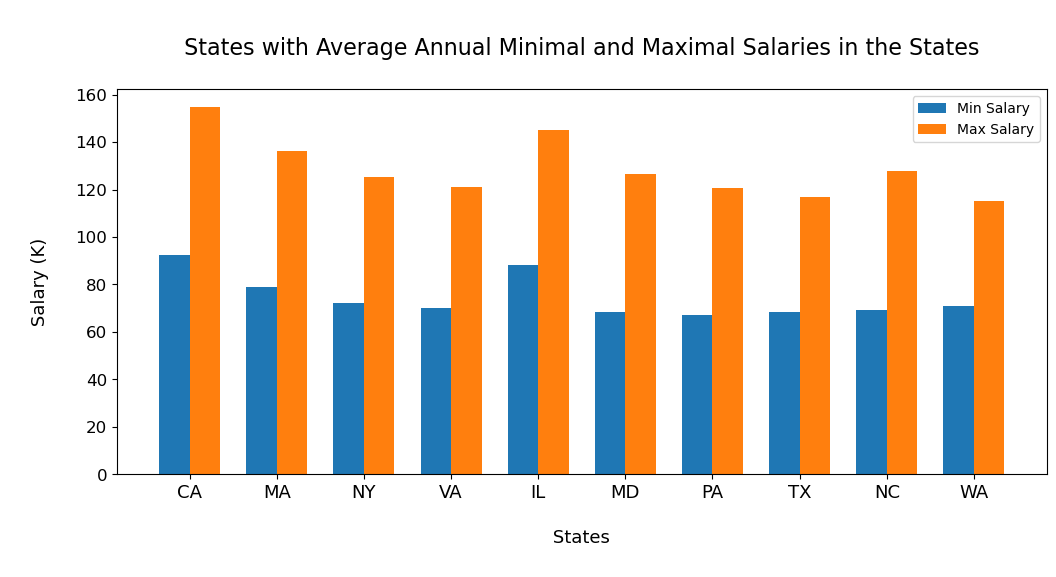

In [51]:
# Drawing the grouped bar plot.

lab=[]
for i in sorter[0:10]:
  lab.append(i)

x = np.arange(len(lab))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(1)
rects1 = ax.bar(x - width/2, a["Lower Salary"][0:10], width, label='Min Salary')
rects2 = ax.bar(x + width/2, a["Upper Salary"][0:10], width, label='Max Salary')

#Beautifying the plot
plt.title('\n States with Average Annual Minimal and Maximal Salaries in the States \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n States \n', fontsize=13, color='black')
plt.ylabel('\n Salary (K) \n', fontsize=13, color='black')

ax.set_xticks(x)
ax.set_xticklabels(lab)
ax.legend()
plt.show()


In [ ]:
# 1. Tiểu bang có số lượng việc làm cao nhất, California cũng có mức lương tối đa trung bình hàng năm cao nhất, tiếp theo là Illinois.
# 2. Cả California và Illinois đều có mức lương tối thiểu trung bình hàng năm gần như nhau.
# 3. Pennsylvania có mức lương tối thiểu trung bình hàng năm thấp nhất trong số 10 bang hàng đầu.
# 4. Washington có mức lương tối đa trung bình hàng năm thấp nhất trong số 10 bang hàng đầu.

In [52]:
#Making a DF of Average Salary of top 10 states in which job postings was maximum.

g = draw.groupby("Job Location")["Avg Salary(K)"].mean().sort_values(ascending=False)[0:10]
g = g.reset_index().rename(columns={"Job Location":"Job Location","Avg Salary(K)":"Average Salary"})

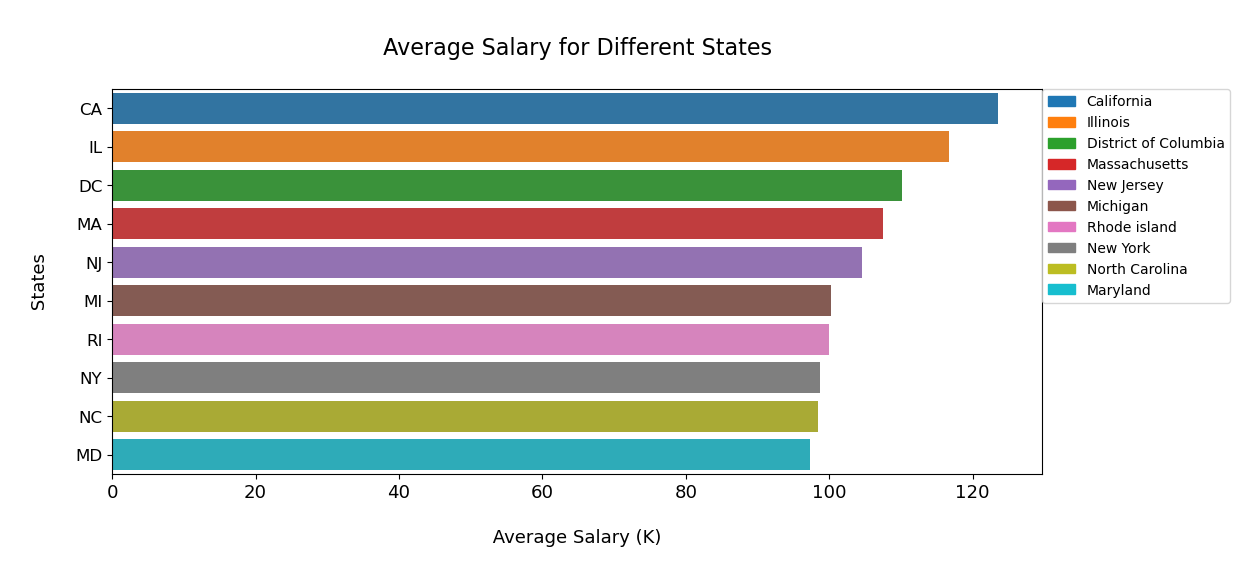

In [53]:
import matplotlib as mat
# Plotting the average salary per annum for different states.
lab=["California","Illinois","District of Columbia","Massachusetts","New Jersey","Michigan","Rhode island","New York","North Carolina","Maryland"]

sns.barplot(y="Job Location", x = "Average Salary",data=g,palette=sns.color_palette())

#Beautifying the plot

plt.title('\n Average Salary for Different States \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Average Salary (K) \n', fontsize=13, color='black')
plt.ylabel('\n States \n', fontsize=13, color='black')
patches = [mat.patches.Patch(color=sns.color_palette()[i], label=j) for i,j in zip(range(0,10),lab)]
plt.legend(handles=patches,bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()


In [54]:
# To show all the records
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

pd.pivot_table(df, index = ['Job Location','job_title_sim'], values = 'Avg Salary(K)', aggfunc = 'count').sort_values('Job Location', ascending = False)

Avg Salary(K)
Job Location job_title_sim                                
WI           other scientist                             4
             data scientist                              3
             analyst                                     3
WA           other scientist                             1
             data scientist                             17
             analyst                                     3
VA           machine learning engineer                   2
             data scientist                             23
             data engineer                              10
             analyst                                     6
UT           data scientist                              3
             data engineer                               3
             analyst                                     4
TX           data engineer                               8
             data scientist                             13
             other scientist                             7
TN           data scientist                              1
             data engineer                              10
             analyst                                     2
SC           other scientist                             1
RI           analyst                                     1
PA           other scientist                             6
             machine learning engineer                   7
             data scientist                             10
             data engineer                               1
             analyst                                     8
             Data scientist project manager              1
OR           data scientist                              3
             data engineer                               1
OH           data scientist                              7
             analyst                                     4
             other scientist                             3
NY           other scientist                            10
             machine learning engineer                   2
             data scientist                             40
             data modeler                                1
             data engineer                               4
             data analitics                              1
             analyst                                    14
NM           data scientist                              3
NJ           Data scientist project manager              2
             other scientist                             1
             data scientist                              6
             data engineer                               2
             analyst                                     6
NE           other scientist                             4
NC           other scientist                            12
             data scientist                              3
             data engineer                               6
MO           other scientist                             1
             na                                          2
             data scientist                              3
             analyst                                     2
             Data scientist project manager              1
MN           data engineer                               1
             analyst                                     1
MI           data scientist                              4
             Data scientist project manager              2
MD           other scientist                            12
             data scientist                             13
             na                                          3
             data modeler                                1
             data engineer                               3
             analyst                                     3
MA           other scientist                            39
             na                                          2
             director            

In [ ]:
# 1. California có mức lương trung bình hàng năm cao nhất, tiếp theo là Illinois. 
# 2. Maryland có mức lương trung bình hàng năm thấp nhất.
# 3. Mức lương trung bình của California cao gấp đôi mức lương trung bình của Alabama, Delaware, South Carolina, Idaho, Louisiana và Nebraska.

In [55]:
#Making a DF of Average Salary of top 10 states in which job postings was maximum.

g = draw.groupby("Job Location")["Avg Salary(K)"].mean().sort_values(ascending=False)
g = g.reset_index().rename(columns={"Job Location":"Job Location","Avg Salary(K)":"Average Salary"})

# Converting "Job Location" column to a category and setting the sorter
g["Job Location"] = g["Job Location"].astype("category")
g["Job Location"] = g["Job Location"].cat.set_categories(sorter)

# Resetting and dropping the index
g = g.sort_values(["Job Location"]).reset_index(drop=True)

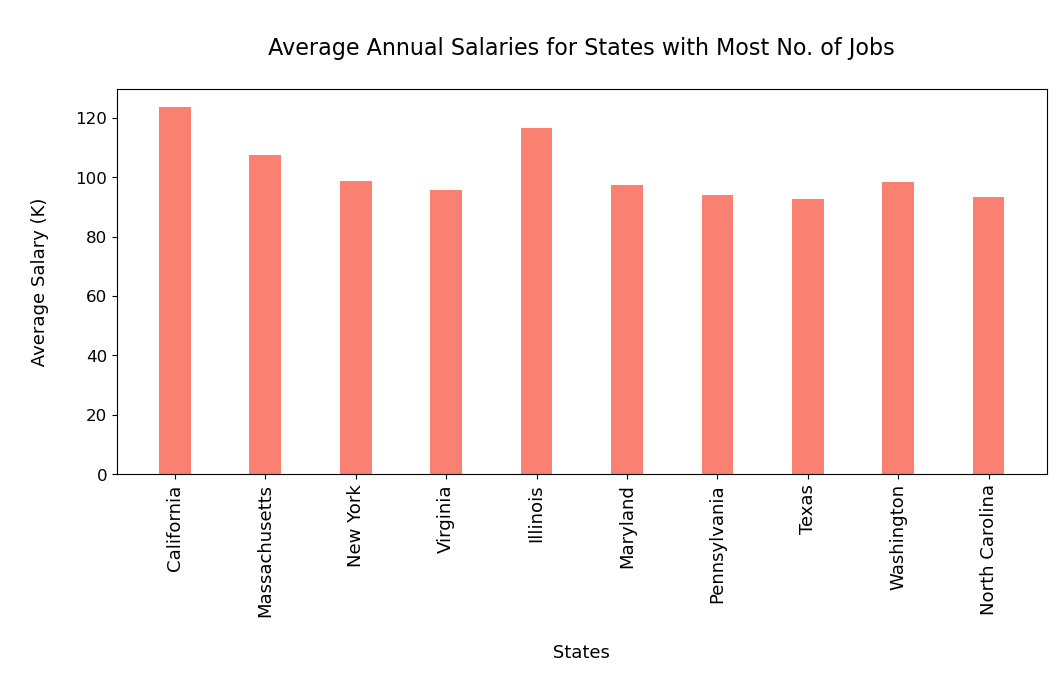

In [56]:
#Drawing bar plot of average salaries reported by top 10 states with most no. of jobs.
labe=["California","Massachusetts","New York","Virginia","Illinois","Maryland","Pennsylvania","Texas","Washington","North Carolina"]

lab=[]
for i in sorter[0:10]:
  lab.append(i)

x = np.arange(len(lab))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(1)
rects1 = ax.bar(x, g["Average Salary"][0:10], width, label='Average Salary', color="salmon")

#Beautifying the plot

plt.title('\n Average Annual Salaries for States with Most No. of Jobs \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.xticks(rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('\n States \n', fontsize=13, color='black')
plt.ylabel('\n Average Salary (K) \n', fontsize=13, color='black')
ax.set_xticks(x)
ax.set_xticklabels(labe)
plt.show()

In [ ]:
# 1. California có mức lương trung bình hàng năm cao nhất trong số 10 tiểu bang, tiếp theo là Illinois.
# 2. Pennsylvania, Texas và Washington có mức lương trung bình hàng năm gần như bằng nhau.
# 3. Chỉ có 3 trong số 10 tiểu bang, California, Massachusetts và Illinois, có mức lương trung bình hàng năm trên 100 nghìn đô la.

In [57]:
#Lets see how many industries we have in the dataset.

draw["Industry"].nunique()

60

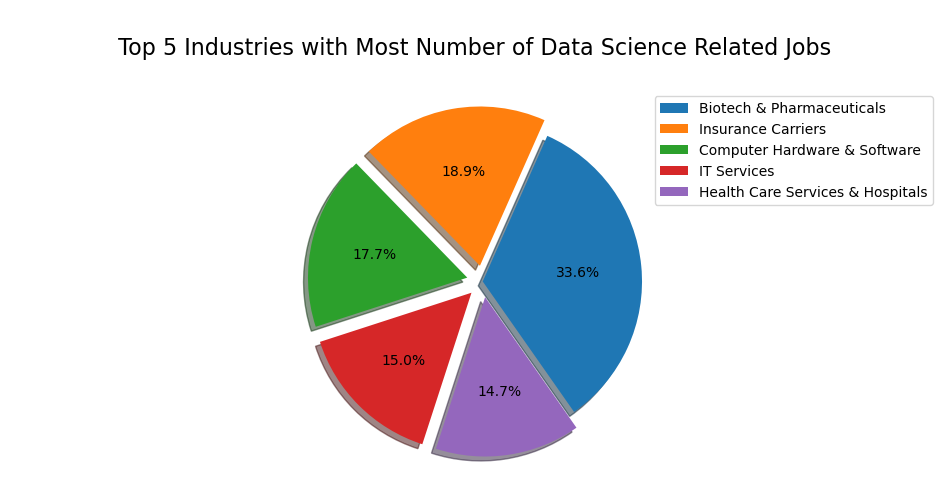

In [58]:
#Plotting pie chart

my_explode=(0,0.1,0.1,0.1,0.1)
labels= [x for x in df["Industry"].value_counts().sort_values(ascending=False)[0:5].index] # piechart for only top 5 industry
patches,ax, text= plt.pie(df["Industry"].value_counts().sort_values(ascending=False)[0:5],autopct='%1.1f%%',explode=my_explode,shadow=True,startangle=305)
plt.title('\n Top 5 Industries with Most Number of Data Science Related Jobs \n', size=16, color='black')
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.show()

In [59]:
for (i,j) in zip(draw["Industry"].value_counts().sort_values(ascending=False)[0:10],range(0,10)):
  print(" Percentage of jobs in {}  :  {:.2f}%".format(draw["Industry"].value_counts().sort_values(ascending=False).index[j],(i/742)*100 ))

 Percentage of jobs in Biotech & Pharmaceuticals  :  15.09%
 Percentage of jobs in Insurance Carriers  :  8.49%
 Percentage of jobs in Computer Hardware & Software  :  7.95%
 Percentage of jobs in IT Services  :  6.74%
 Percentage of jobs in Health Care Services & Hospitals  :  6.60%
 Percentage of jobs in Enterprise Software & Network Solutions  :  5.66%
 Percentage of jobs in Internet  :  3.91%
 Percentage of jobs in Consulting  :  3.91%
 Percentage of jobs in Advertising & Marketing  :  3.37%
 Percentage of jobs in Aerospace & Defense  :  3.37%


In [ ]:

# 1. Ngành Công nghệ sinh học & Dược phẩm có số lượng việc làm tối đa, tiếp theo là các hãng bảo hiểm.
# 2. Ngành CNTT có ít việc làm hơn cho các vai trò liên quan đến khoa học dữ liệu.
# 3. Hơn 65% công việc liên quan đến khoa học dữ liệu nằm trong 10 ngành hàng đầu.
# 4. Đối với tập dữ liệu này, Ngành Công nghệ sinh học & Dược phẩm có số lượng việc làm gấp đôi so với ngành dịch vụ CNTT.
# 5. Có vẻ như ngành Bệnh viện & Dịch vụ Chăm sóc Sức khỏe đang tuyển dụng với tỷ lệ tốt vì họ gần như vượt qua ngành dịch vụ CNTT.

In [60]:
# Making a sorter, to sort the index with Industries having highest number of data science related jobs

sort_ind = draw["Industry"].value_counts().sort_values(ascending=False).index

In [61]:
#Making a DF and sortring it w.r.t. sort_ind

ind = draw.groupby("Industry")[["Lower Salary","Upper Salary"]]   .mean().sort_values("Industry",ascending=False)
ind = ind.reset_index()

# Converting Industry column as Category and setting the sorter.

ind["Industry"] = ind["Industry"].astype("category")
ind["Industry"] = ind["Industry"].cat.set_categories(sort_ind)

#Resetting and droping the index

ind = ind.sort_values(["Industry"]).reset_index(drop=True)
ind.head(2)

,Industry,Lower Salary,Upper Salary
0,Biotech & Pharmaceuticals,79.883929,144.357143
1,Insurance Carriers,77.793651,133.460317


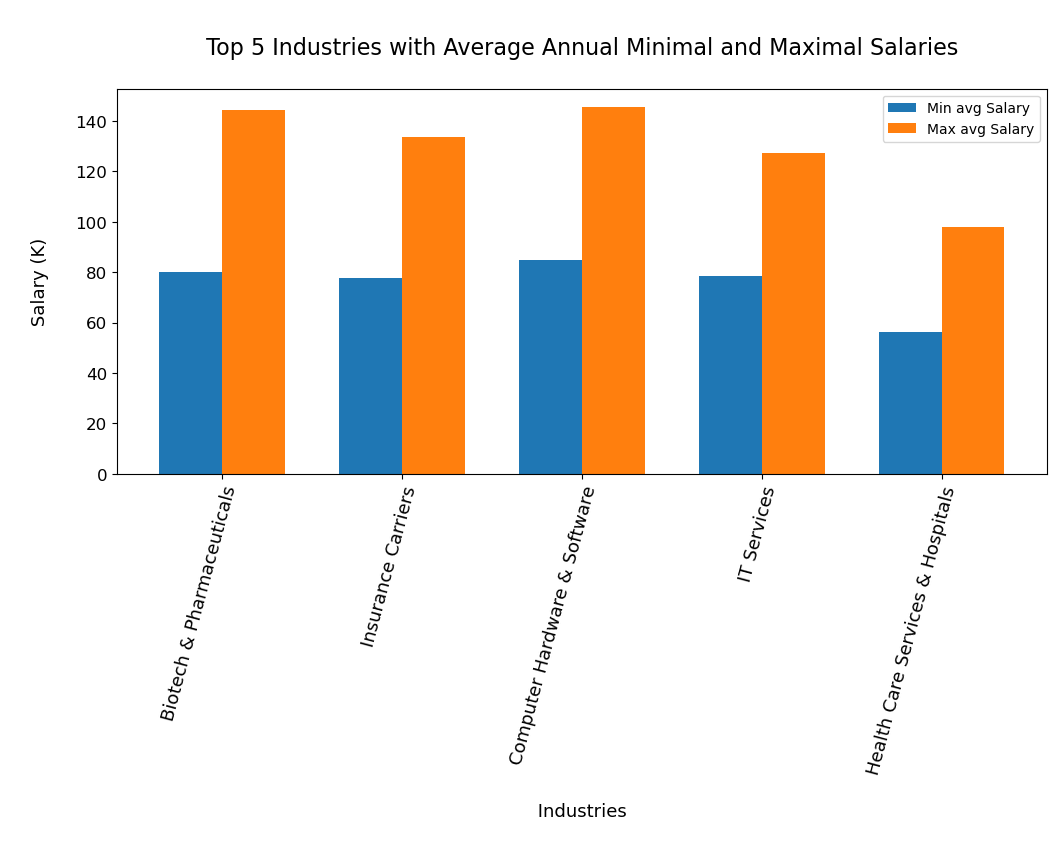

In [62]:
# Drawing the grouped bar plot.

lab=[]
for i in sort_ind[0:5]:
  lab.append(i)

x = np.arange(len(lab))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(1)
rects1 = ax.bar(x - width/2, ind["Lower Salary"][0:5], width, label='Min avg Salary')
rects2 = ax.bar(x + width/2, ind["Upper Salary"][0:5], width, label='Max avg Salary')

#Beautifying the plot
plt.title('\n Top 5 Industries with Average Annual Minimal and Maximal Salaries \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.xticks(rotation=75,ha='right', rotation_mode='anchor')
plt.yticks(fontsize=12)
plt.xlabel('\n Industries \n', fontsize=13, color='black')
plt.ylabel('\n Salary (K) \n', fontsize=13, color='black')
ax.set_xticks(x)
ax.set_xticklabels(lab)
ax.legend(loc="upper right")
plt.show()

In [ ]:
# 1. Ngành Phần cứng & Phần mềm Máy tính có mức lương tối đa trung bình cao nhất trong 5 ngành được chọn, tiếp theo là Công nghệ sinh học & Dược phẩm.
# 2. Ngành Phần cứng & Phần mềm Máy tính cũng có mức lương tối thiểu trung bình cao nhất trong số 5 ngành được chọn, tiếp theo là Công nghệ sinh học & Dược phẩm.
# 3. Ngành Dịch vụ chăm sóc sức khỏe & Bệnh viện có mức lương tối đa và tối thiểu trung bình thấp nhất trong số 5 ngành được chọn.

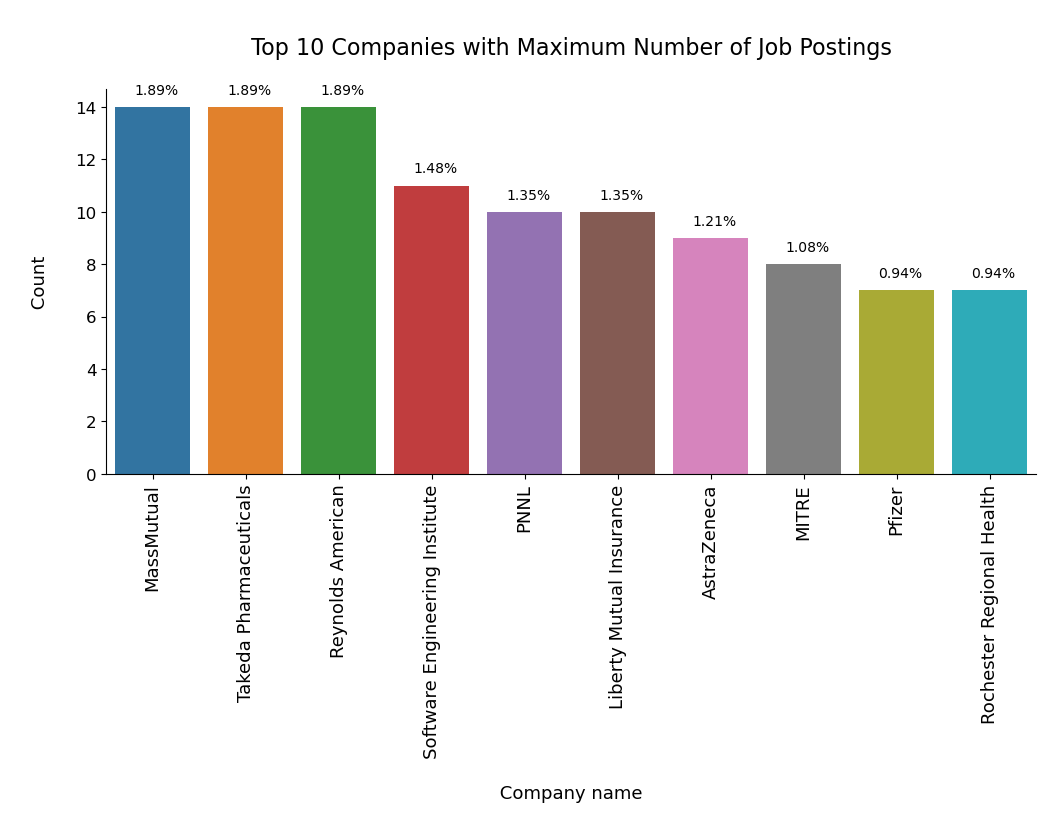

In [63]:
# Viualizing the above information

from IPython.core.pylabtools import figsize
#Lets visualize the top 10 companies with the most number of job postings.

fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x= draw["company_txt"].value_counts().sort_values(ascending=False).head(10).index ,y= draw["company_txt"].value_counts().sort_values(ascending=False).head(10),palette=sns.color_palette())

#Removing top and Right borders

sns.despine(bottom = False, left = False)

# figure size in inches
import matplotlib
from matplotlib import rcParams
#rcParams['figure.figsize'] = 12,5

#Putting % on the bar plot. Credit: Stackoverflow

spots = draw["company_txt"].value_counts().sort_values(ascending=False).index[0:10]
for p in ax.patches:
    ax.text(p.get_x() + 0.2, p.get_height()+0.5, '{:.2f}%'.format((p.get_height()/742)*100))

#Beautifying the plot
plt.title('\n Top 10 Companies with Maximum Number of Job Postings \n', size=16, color='black')
plt.xticks(fontsize=13,rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('\n Company name \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

In [ ]:
# 1. Có tổng cộng 342 công ty trong tập dữ liệu. Đây là lý do tại sao số lượng tin tuyển dụng của mỗi công ty lại ít hơn.
# 2. Công ty Reynolds American, MassMutrual và Takeda Pharmaceuticals đứng đầu danh sách với 14 tin tuyển dụng liên quan đến khoa học dữ liệu.

In [64]:
sort_com = draw["company_txt"].value_counts().sort_values(ascending=False).index

In [65]:
#Making a DF and sortring it w.r.t. sort_com

com = draw.groupby("company_txt")[["Lower Salary","Upper Salary"]].mean().sort_values("company_txt",ascending=False)
com = com.reset_index()

# Converting company_txt column as Category and setting the sorter.

com["company_txt"] = com["company_txt"].astype("category")
com["company_txt"] = com["company_txt"].cat.set_categories(sort_com)

#Resetting and droping the index

com = com.sort_values(["company_txt"]).reset_index()
com = com.drop("index",axis=1)
com.head(5)

,company_txt,Lower Salary,Upper Salary
0,MassMutual,70.142857,131.071429
1,Takeda Pharmaceuticals,94.285714,170.285714
2,Reynolds American,66.500000,129.785714
3,Software Engineering Institute,73.272727,142.727273
4,PNNL,65.100000,109.000000


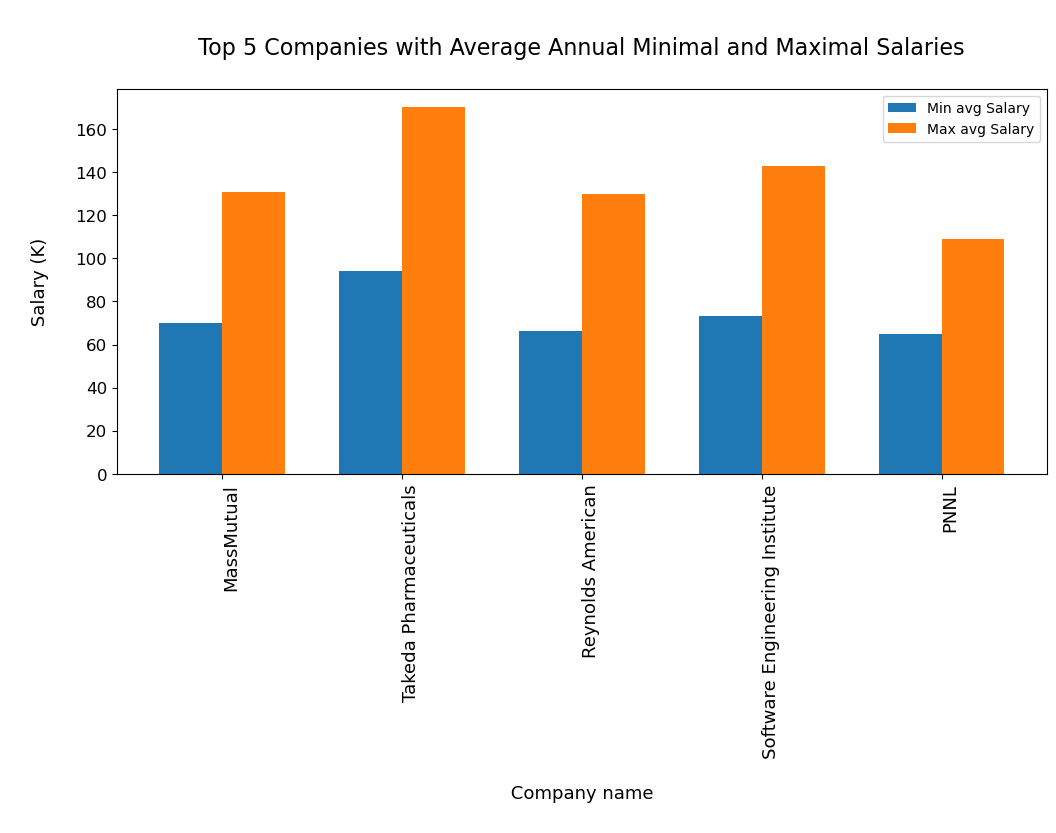

In [66]:
# Drawing the grouped bar plot.

lab=[]
for i in sort_com[0:5]:
  lab.append(i)

x = np.arange(len(lab))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(1)
rects1 = ax.bar(x - width/2, com["Lower Salary"][0:5], width, label='Min avg Salary')
rects2 = ax.bar(x + width/2, com["Upper Salary"][0:5], width, label='Max avg Salary')

#Beautifying the plot
plt.title('\n Top 5 Companies with Average Annual Minimal and Maximal Salaries \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.yticks(fontsize=12)
plt.xlabel('\n Company name \n', fontsize=13, color='black')
plt.ylabel('\n Salary (K) \n', fontsize=13, color='black')
ax.set_xticks(x)
ax.set_xticklabels(lab)
ax.legend(loc="upper right")
plt.show()

In [ ]:
# Một lần nữa, chúng ta thấy rằng một Công ty Dược phẩm đưa ra mức lương hàng năm tối thiểu và tối đa cao nhất.

In [67]:
sz = draw.groupby("Size")[["Lower Salary", "Upper Salary", "Avg Salary(K)"]].mean().sort_values("Avg Salary(K)", ascending=False)
sz = sz.drop("unknown", axis=0)  # Dropping unknown company size records
sz

,Lower Salary,Upper Salary,Avg Salary(K)
Size,,,
10000+,83.661538,141.946154,112.803846
51 - 200,84.468085,139.074468,111.771277
1 - 50,78.580645,131.548387,105.064516
201 - 500,72.136752,128.358974,100.247863
5001 - 10000,70.421053,124.552632,97.486842
1001 - 5000,68.953333,120.426667,94.690000
501 - 1000,66.865672,116.141791,91.503731


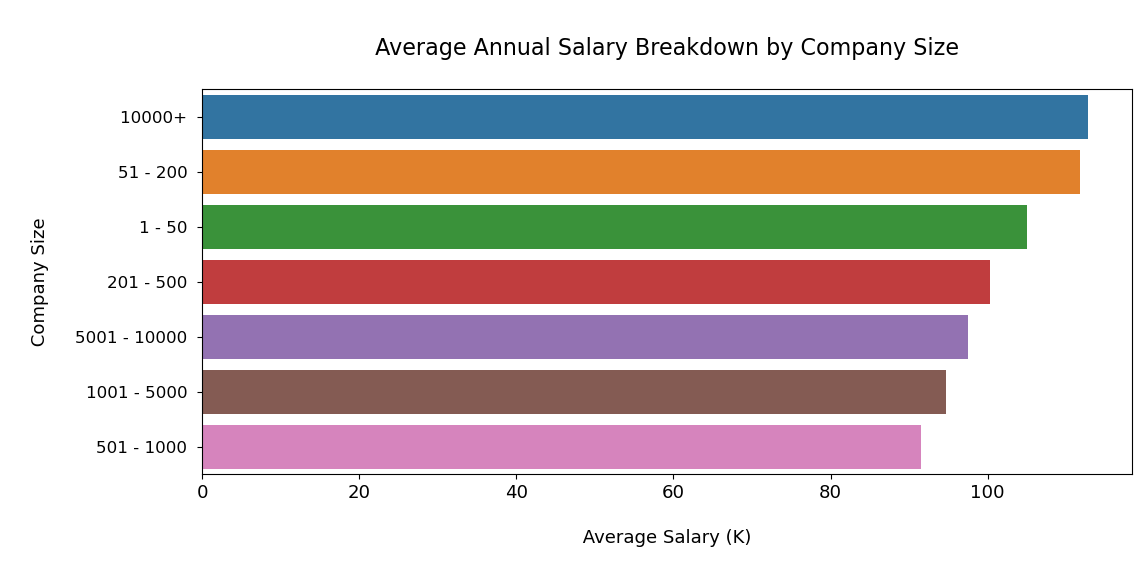

In [68]:
# Plotting company employee size v/s average annual salary.

sns.barplot(y= sz.index,x=sz["Avg Salary(K)"],palette=sns.color_palette())
#Beautifying the plot

plt.title('\n Average Annual Salary Breakdown by Company Size \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Average Salary (K) \n', fontsize=13, color='black')
plt.ylabel('\n Company Size \n', fontsize=13, color='black')
plt.show()

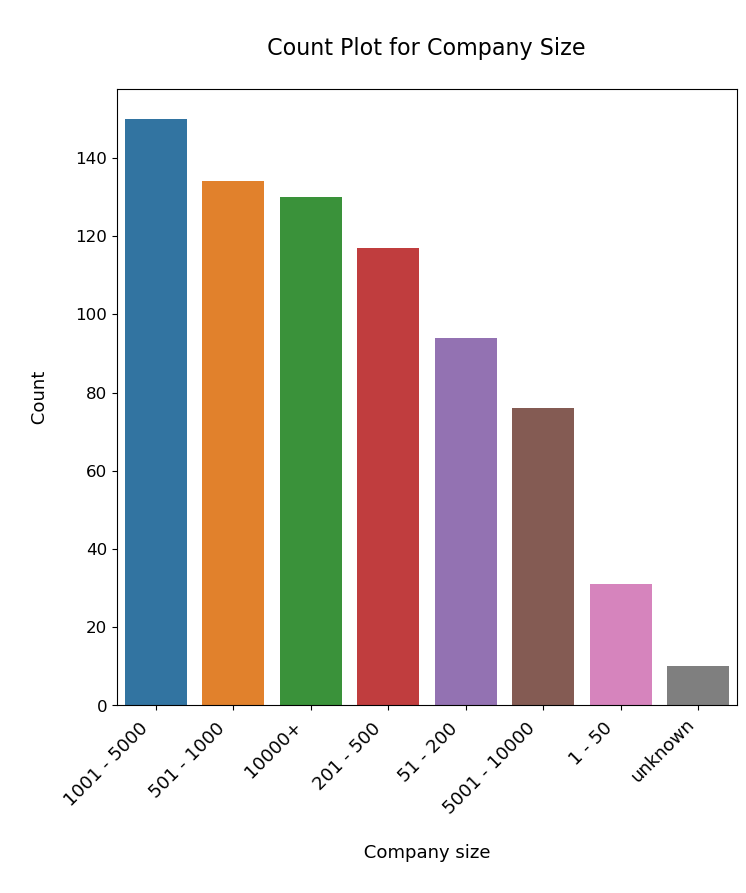

In [69]:
#Looking at the count of companies w.r.t. their size.

plt.figure(figsize=(8,8))
g = sns.countplot(x='Size', data=draw, order = draw['Size'].value_counts().index,palette=sns.color_palette())

#Beautifying the plot

plt.title('\n Count Plot for Company Size \n', size=16, color='black')
plt.xticks(fontsize=13,rotation=45, horizontalalignment='right')
plt.yticks(fontsize=12)
plt.xlabel('\n Company size \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

In [ ]:
# 1. Những công ty có số lượng nhân viên lớn nhất sẽ đưa ra mức lương cao.
# 2. Quy mô công ty từ 51-200 có mức lương gần như ngang bằng với công ty lớn nhất.
# 3. Không có gì đáng ngạc nhiên khi các công ty có dưới 50 nhân viên đưa ra mức lương tốt thứ ba. Đây thường là những công ty khởi nghiệp.
# 4. Mặc dù phổ biến nhất là các công ty có 501-5000 nhân viên nhưng họ đưa ra mức lương ít nhất.

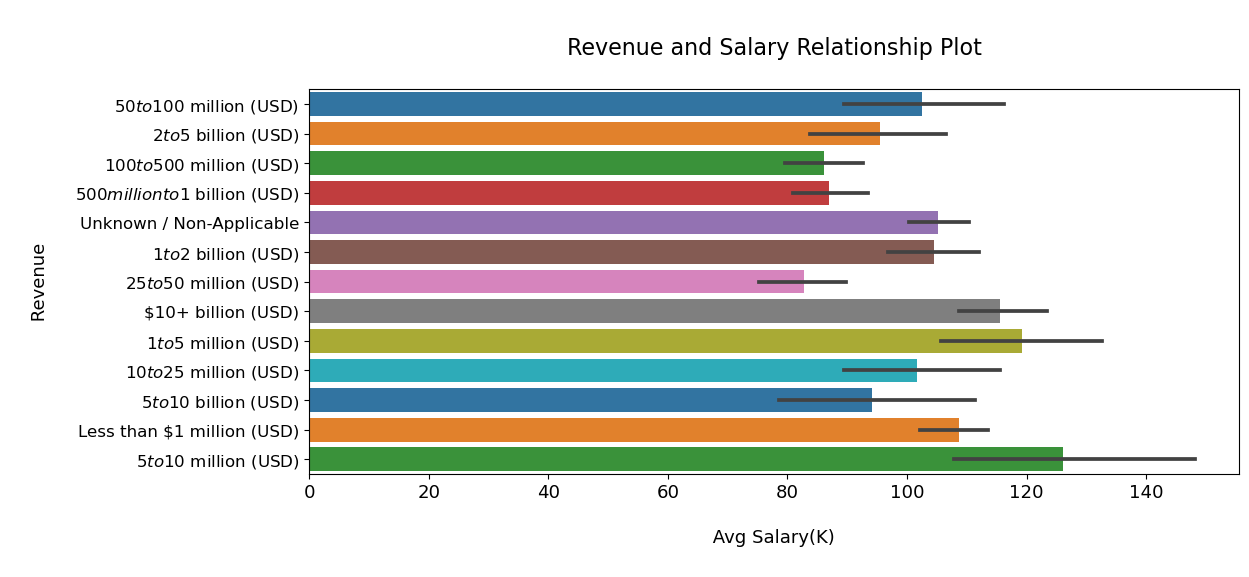

In [70]:
# looking at the relation between company size and revenue
sns.barplot(y="Revenue",x="Avg Salary(K)",data=draw,palette=sns.color_palette())

#Beautifying the plot

plt.title('\n Revenue and Salary Relationship Plot \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Avg Salary(K) \n', fontsize=13, color='black')
plt.ylabel('\n Revenue \n', fontsize=13, color='black')
plt.show()

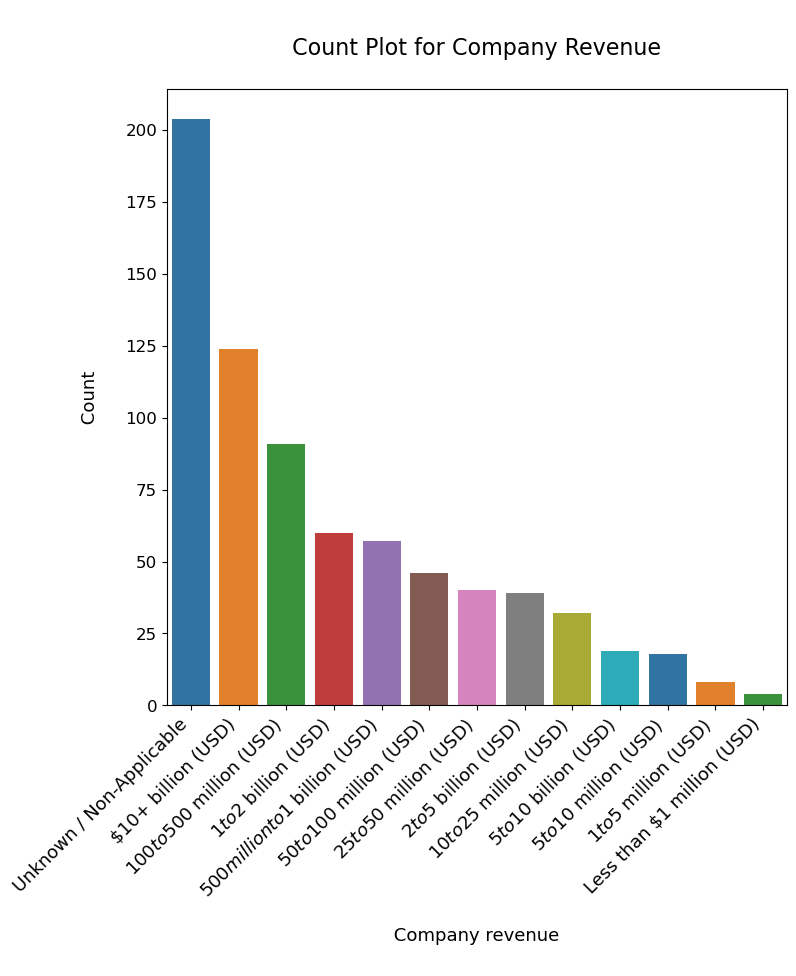

In [71]:
#Looking at the count of companies w.r.t. their revenue.

plt.figure(figsize=(8,8))
g = sns.countplot(x='Revenue', data=draw, order = draw['Revenue'].value_counts().index,palette=sns.color_palette())

#Beautifying the plot

plt.title('\n Count Plot for Company Revenue \n', size=16, color='black')
plt.xticks(fontsize=13,rotation=45, horizontalalignment='right')
plt.yticks(fontsize=12)
plt.xlabel('\n Company revenue \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

In [ ]:
# Các công ty đáng ngạc nhiên có doanh thu từ 5-10 triệu sẽ trả lương nhiều hơn, tiếp theo là các công ty có doanh thu từ 1 triệu đến các công ty có doanh thu trên 10 tỷ

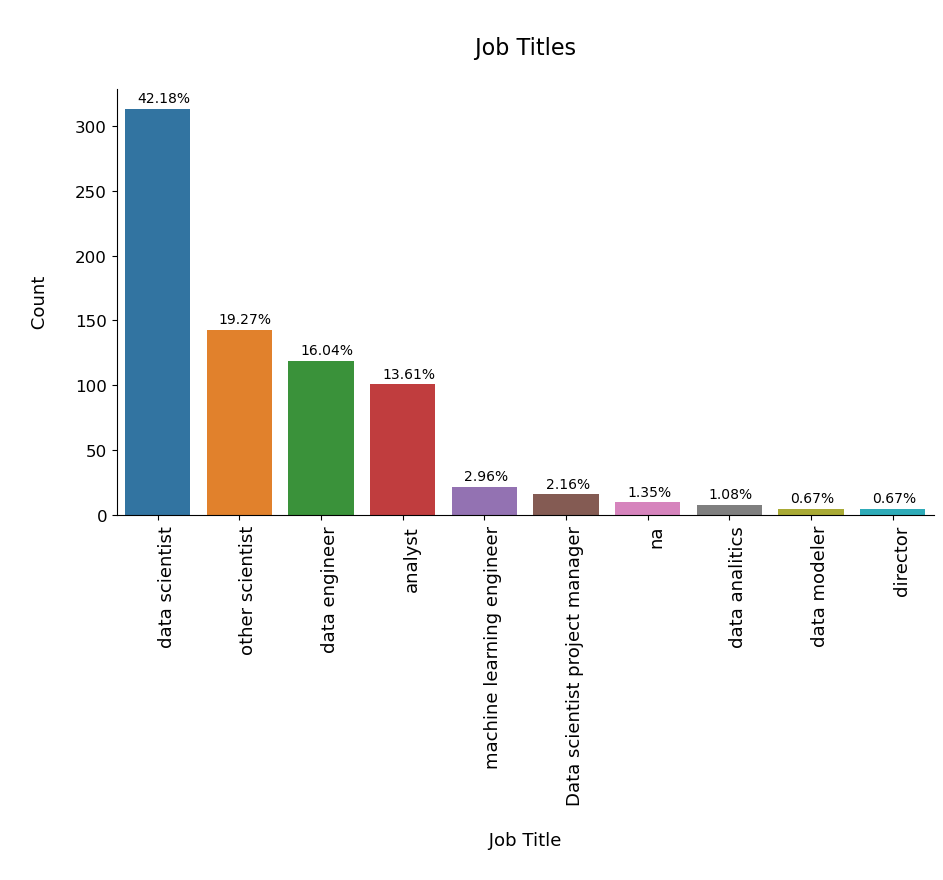

In [72]:
# Looking at the most in demand job titles.

catp = sns.catplot(x="job_title_sim",data=draw,order=draw.job_title_sim.value_counts().index,kind="count")
catp.fig.set_size_inches(10,5)


#Putting % on the bar plot. Credit: Stackoverflow

spots = draw.job_title_sim.value_counts().index
ax = catp.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, p.get_height()+5, '{:.2f}%'.format((p.get_height()/742)*100))

#Beautifying the plot

plt.title('\n Job Titles \n', size=16, color='black')
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Job Title \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()


In [ ]:
# 1. Một số lượng lớn các tin tuyển dụng dành cho Nhà khoa học dữ liệu, tiếp theo là các nhà khoa học khác (nhà khoa học nghiên cứu, nhà tư vấn, v.v.) và kỹ sư dữ liệu.
# 2. Nhà khoa học dữ liệu, kỹ sư dữ liệu và nhà phân tích dữ liệu chiếm khoảng 72% số bài đăng.
# 3. Các kỹ sư ML đang có nhu cầu thấp.

In [73]:
#Drawing a pivot table.
pd.pivot_table(draw,index=["job_title_sim","seniority_by_title"],values="Avg Salary(K)")

Avg Salary(K)
job_title_sim                  seniority_by_title               
Data scientist project manager na                      73.218750
analyst                        jr                      53.250000
                               na                      61.215278
                               sr                      80.129630
data analitics                 na                      69.250000
data engineer                  na                      96.701220
                               sr                     124.689189
data modeler                   na                      77.500000
data scientist                 jr                     106.500000
                               na                     110.191038
                               sr                     135.590000
director                       na                     130.800000
machine learning engineer      na                     119.133333
                               sr                     142.071429
na                             na                      91.062500
                               sr                      93.000000
other scientist                na                      76.421875
                               sr                     111.819149

In [ ]:
# Kỹ sư ML cao cấp đang nhận được mức lương cao nhất trong khi Kỹ sư ML bình thường được trả ít hơn ~ 20%. Tiếp theo là nhà khoa học dữ liệu cấp cao đang kiếm được nhiều hơn ~ 28% so với nhà khoa học dữ liệu cấp dưới.
# Một nhà phân tích dữ liệu cấp cao đang nhận được mức lương thấp hơn ~ 78% so với kỹ sư ML cấp cao và thấp hơn ~ 70% so với một nhà khoa học dữ liệu cấp cao.
# Một kỹ sư dữ liệu cấp cao đang nhận mức lương thấp hơn ~ 15% so với kỹ sư ML cấp cao và thấp hơn ~ 9% so với một nhà khoa học dữ liệu cấp cao.
# na có nghĩa là cấp bậc thâm niên công việc không được đề cập trong mô tả công việc

In [74]:
salary=["Avg Salary(K)"]
draw.groupby('job_title_sim')[salary].mean().sort_values("Avg Salary(K)",ascending=False)

,Avg Salary(K)
job_title_sim,
director,130.800000
machine learning engineer,126.431818
data scientist,118.293930
data engineer,105.403361
na,91.450000
other scientist,88.055944
data modeler,77.500000
Data scientist project manager,73.218750
data analitics,69.250000


In [ ]:
# Giám đốc khoa học dữ liệu là công việc được trả lương cao nhất trong tập dữ liệu, tiếp theo là Kỹ sư ML, Nhà khoa học dữ liệu, Kỹ sư dữ liệu và Nhà phân tích dữ liệu.
# Mặc dù các kỹ sư ML có như cầu thấp nhưng lương lại đứng thứ 2 so với các vị trí khác

In [75]:
draw_pivots = draw[['job_title_sim','Python', 'spark', 'aws', 'excel','sql','sas','keras','pytorch','scikit','tensor','hadoop','tableau','bi','flink','mongo','google_an','Avg Salary(K)']]

In [76]:
# Checking Average Salary  and counts for each skills
skills = ['Python', 'spark', 'aws', 'excel','sql','sas','keras','pytorch','scikit','tensor','hadoop','tableau','bi','flink','mongo','google_an']
for i in skills:
  a = pd.pivot_table(draw_pivots, index = 'job_title_sim', columns = i, values = 'Avg Salary(K)', aggfunc = ['mean','count']).rename(columns={"mean":"Avg Salary(K)"})
  print(a)

                               Avg Salary(K)              count       
Python                                     0           1      0      1
job_title_sim                                                         
Data scientist project manager     69.833333   83.375000   12.0    4.0
analyst                            61.385714   76.790323   70.0   31.0
data analitics                     62.500000   73.300000    3.0    5.0
data engineer                     105.488095  105.357143   42.0   77.0
data modeler                       94.833333   51.500000    3.0    2.0
data scientist                    112.315068  120.112500   73.0  240.0
director                          130.800000         NaN    5.0    NaN
machine learning engineer         124.000000  126.972222    4.0   18.0
na                                 78.250000  111.250000    6.0    4.0
other scientist                    85.496212  118.772727  132.0   11.0
                               Avg Salary(K)              count      
spark  

In [ ]:
# Chúng tôi thấy rằng các vị trí công việc có kỹ năng Python và AWS được đề cập trong mô tả công việc đang được trả nhiều tiền hơn.
# Đáng ngạc nhiên, mức lương thấp hơn cho các tin tuyển dụng có đề cập đến kỹ năng Excel.
# Ngoài ra, không có nhiều mối liên hệ giữa kỹ năng còn lại và mức lương trung bình hàng năm cho các vị trí công việc khác nhau.

In [77]:
pd.pivot_table(draw, index = 'job_title_sim', columns = "Degree", values = 'Avg Salary(K)', aggfunc = ['mean','count']).rename(columns={"mean":"Avg Salary(K)"})

Avg Salary(K)                          count  \
Degree                                     M           P          na      M   
job_title_sim                                                                 
Data scientist project manager     83.800000         NaN   68.409091    5.0   
analyst                            61.333333         NaN   67.858108   27.0   
data analitics                     82.500000         NaN   61.300000    3.0   
data engineer                     103.714286  132.250000  105.469512   35.0   
data modeler                       63.166667         NaN   99.000000    3.0   
data scientist                    117.847826  129.578947  115.613139  138.0   
director                                 NaN  150.666667  101.000000    NaN   
machine learning engineer         125.000000  134.200000  118.950000    2.0   
na                                 92.000000         NaN   91.083333    4.0   
other scientist                   102.771429  100.509259   66.064815   35.0   

                                             
Degree                             P     na  
job_title_sim                                
Data scientist project manager   NaN   11.0  
analyst                          NaN   74.0  
data analitics                   NaN    5.0  
data engineer                    2.0   82.0  
data modeler                     NaN    2.0  
data scientist                  38.0  137.0  
director                         3.0    2.0  
machine learning engineer       10.0   10.0  
na                               NaN    6.0  
other scientist                 54.0   54.0

In [ ]:
# Hầu hết các công ty đều đề cập đến bằng Thạc sĩ trong mô tả công việc của họ.
# Đối với các công ty đề cập đến bằng Tiến sĩ trong mô tả công việc của họ, họ đưa ra mức lương trung bình hàng năm cao hơn nhiều so với Thạc sĩ.

Vai trò của các đặc trưng đối với mục tiêu bài toán

In [ ]:


# 1. Job Title:
# Bài toán phân loại (Classification): Có thể sử dụng để phân loại công việc vào các nhóm hoặc ngành nghề khác nhau.
# Bài toán hồi quy(Regression): Có thể ảnh hưởng đến mức lương dựa trên chức vụ công việc.

# 2. Salary Estimate, Avg Salary(K):
# Bài toán hồi quy: Là biến mục tiêu trong bài toán dự đoán mức lương.

# 3. Rating, Company Name, Location, Headquarters, Size, Founded, Type of ownership, Industry, Sector, Revenue, Competitors, company_txt, Job Location, Age:
# Bài toán phân loại: Các thông tin về công ty có thể được sử dụng để phân loại công việc vào các ngành nghề, loại hình doanh nghiệp, quy mô, v.v.

# 4. Hourly, Employer provided:
# Bài toán phân loại: Xác định loại hình cung cấp lương có thể được sử dụng để phân loại các công việc.

# 5. Lower Salary, Upper Salary:
# Bài toán hồi quy: Dữ liệu lương có thể được sử dụng để dự đoán mức lương.

# 6. Python, spark, aws, excel, sql, sas, keras, pytorch, scikit, tensor, hadoop, tableau, bi, flink, mongo, google_an:
# Bài toán phân loại: Các kỹ năng kỹ thuật có thể được sử dụng để phân loại các công việc theo yêu cầu kỹ năng cụ thể.

# 7. job_title_sim, seniority_by_title:
# Phân loại: Dữ liệu về chức danh và thâm niên có thể được sử dụng để phân loại công việc.

# 8. Degree:
# bài toán phân loại: Loại hình học vấn có thể được sử dụng để phân loại công việc theo yêu cầu học vấn.

Câu 2 Ứng dụng các mô hình học máy cơ bản để giải quyết bài toán, bao gồm cả các mô hình thuộc Ensemble Learing và các kỹ thuật tránh Overfitting trên mô hình (Ensemble Learing).

Bagging và Boosting sử dụng bài toán Regression với target là cột "Avg Salary(K)"

In [78]:
names = list(draw.columns)

g = draw[names[-1]].value_counts()
types = draw.dtypes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in range(len(types)):
  if types[i] == 'object':
    draw[names[i]] = le.fit_transform(draw[names[i]])

data = draw.values

x = data[:,:-1]
y = data[:,-1]


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,random_state=42,test_size=0.25)


In [79]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

np.random.seed(42)

#Áp dụng phương pháp Univariate Selection để chọn ra 2 feature quan trọng nhất
selector = SelectKBest(score_func=mutual_info_classif, k=20)
selector.fit(x_train, y_train)
feature_scores = selector.scores_

# Đánh giá tầm quan trọng của các đặc trưng 
print("Feature scores:")
for feature, score in zip(names, feature_scores):
    print(f"{feature}: {score}")

#lấy ra số lượng feature quan trọng nhất 
print()
feature_indices = selector.get_support(indices=True)
important_features = [names[i] for i in feature_indices]
print("Important Features:", important_features)

Feature scores:
Job Title: 0.19954096967471657
Salary Estimate: 0.22322746111773872
Rating: 0.07381752476485559
Company Name: 0.21951414614404818
Location: 0.1888684774797964
Headquarters: 0.22341255461321574
Size: 0.05566805542273401
Founded: 0.17010164173979248
Type of ownership: 0.02513100283027514
Industry: 0.1139048961977982
Sector: 0.099579120961093
Revenue: 0.06487661226259589
Competitors: 0.13373682687852884
Hourly: 0.04139383204031266
Employer provided: 0.022684556755927288
Lower Salary: 0.151885904647741
Upper Salary: 0.11257665130657002
Avg Salary(K): 0.09659837030227703
company_txt: 0.2164925129806572
Job Location: 0.1043115088082045
Age: 0.1615300221138427
Python: 0.0
spark: 0.0019997480898783504
aws: 0.01194010925050426
excel: 0.0
sql: 0.038654199845956194
sas: 0.04656162794547036
keras: 0.0
pytorch: 0.0252267222448761
scikit: 0.0
tensor: 0.0
hadoop: 0.010779640038444782
tableau: 0.03501560140705129
bi: 0.0
flink: 0.01300854178568156
mongo: 0.04285712264681352
google_an: 

In [80]:
df= pd.read_csv("data_cleaned_2021.csv")
salary=df
pd.options.display.max_columns=None
salary.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,FL,11,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,56,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,23,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,na


In [81]:
salary.shape
salary=salary.replace(['-1'],[np.nan])
salary=salary.replace([-1],[np.nan])

In [82]:
salary.Rating.unique()

array([3.8, 3.4, 4.8, 2.9, 4.1, 3.3, 4.6, 3.5, 3.2, 3.7, 3.6, 3.9, 4.3,
       4.2, 4. , 4.7, 5. , 3.1, 4.4, 2.8, 2.7, 1.9, 4.5, 3. , 2.3, 2.6,
       nan, 2.4, 2.5, 2.2, 2.1])

In [83]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               742 non-null    int64  
 1   Job Title           742 non-null    object 
 2   Salary Estimate     742 non-null    object 
 3   Job Description     742 non-null    object 
 4   Rating              731 non-null    float64
 5   Company Name        742 non-null    object 
 6   Location            742 non-null    object 
 7   Headquarters        741 non-null    object 
 8   Size                742 non-null    object 
 9   Founded             692 non-null    float64
 10  Type of ownership   742 non-null    object 
 11  Industry            732 non-null    object 
 12  Sector              732 non-null    object 
 13  Revenue             742 non-null    object 
 14  Competitors         282 non-null    object 
 15  Hourly              742 non-null    int64  
 16  Employer

In [84]:
salary = salary.drop(["index", "Job Description", "company_txt"],axis=1)

In [85]:
salary["Company Name"].value_counts()
salary.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,Data Scientist,$53K-$91K (Glassdoor est.),3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973.0,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),NaN,0,0,53,91,72.0,NM,48.0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984.0,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,0,0,63,112,87.5,MD,37.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
2,Data Scientist,$80K-$90K (Glassdoor est.),4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010.0,Company - Private,Security Services,Business Services,$100 to $500 million (USD),NaN,0,0,80,90,85.0,FL,11.0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
3,Data Scientist,$56K-$97K (Glassdoor est.),3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965.0,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,WA,56.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
4,Data Scientist,$86K-$143K (Glassdoor est.),2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,NY,23.0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,na


In [86]:
# As we can see in above data that some columns are repeat like comapany_txt and Job location. Data present in these two columns 
# are same as location and Job title. So we are dropping both columns 
print(salary.columns)
print("---")
#kiểm tra xem có cột nào bị thiếu giá trị không và thiếu bao nhiêu
print(salary.isnull().sum())

Index(['Job Title', 'Salary Estimate', 'Rating', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'Hourly', 'Employer provided',
       'Lower Salary', 'Upper Salary', 'Avg Salary(K)', 'Job Location', 'Age',
       'Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch',
       'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo',
       'google_an', 'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')
---
Job Title               0
Salary Estimate         0
Rating                 11
Company Name            0
Location                0
Headquarters            1
Size                    0
Founded                50
Type of ownership       0
Industry               10
Sector                 10
Revenue                 0
Competitors           460
Hourly                  0
Employer provided       0
Lower Salary            0
Upper Salary            0
Avg Salar

xử lý các chỗ bị thiếu giá trị trong các cột có giá trị NaN

In [87]:
# điền các giá trị thiếu (NaN) trong các cột ("Competitors", "Industry", "Sector", "Headquarters") 
# bằng giá trị mode (xuất hiện nhiều nhất) của từng cột.
salary["Competitors"] = salary["Competitors"].fillna(salary["Competitors"].mode()[0]) 
salary["Industry"] = salary["Industry"].fillna(salary["Industry"].mode()[0]) 
salary["Sector"] = salary["Sector"].fillna(salary["Sector"].mode()[0]) 
salary["Headquarters"] = salary["Headquarters"].fillna(salary["Headquarters"].mode()[0]) 

tiếp tục xử lý các chỗ bị thiếu trong cột chứa giá trị số

In [88]:
# thay giá trị còn thiếu trong Rating bằng trung bình của cột này
salary["Rating"] = salary["Rating"].fillna(salary["Rating"].mean())
#thay the gia tri còn thiếu trong cột Age bằng trung bình cột đó
salary["Age"] = salary["Age"].fillna(salary["Age"].median())
#thay thế giá trị còn thiếu trong founded bằng giá trị trung vị
salary["Founded"] = salary["Founded"].fillna(salary["Founded"].median())
#thay the các giá trị Age nằm ngoài khoảng 18-70 bằng giá trị random trong khoảng đó
salary.loc[salary['Age'] < 14 , 'Age'] = random.randint(14,67)
salary.loc[salary['Age'] > 67 , 'Age'] = random.randint(14,67)

In [89]:
#check lại các giá trị null
print(salary.isnull().sum())
salary.describe()

Job Title             0
Salary Estimate       0
Rating                0
Company Name          0
Location              0
Headquarters          0
Size                  0
Founded               0
Type of ownership     0
Industry              0
Sector                0
Revenue               0
Competitors           0
Hourly                0
Employer provided     0
Lower Salary          0
Upper Salary          0
Avg Salary(K)         0
Job Location          0
Age                   0
Python                0
spark                 0
aws                   0
excel                 0
sql                   0
sas                   0
keras                 0
pytorch               0
scikit                0
tensor                0
hadoop                0
tableau               0
bi                    0
flink                 0
mongo                 0
google_an             0
job_title_sim         0
seniority_by_title    0
Degree                0
dtype: int64


,Rating,Founded,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.688372,1971.454178,0.032345,0.022911,74.754717,128.214286,101.484501,33.948787,0.528302,0.225067,0.237197,0.522911,0.512129,0.088949,0.039084,0.052561,0.072776,0.097035,0.167116,0.199461,0.075472,0.013477,0.049865,0.018868
std,0.566104,52.524552,0.177034,0.149721,30.945892,45.128650,37.482449,14.096164,0.499535,0.417908,0.425651,0.499812,0.500190,0.284862,0.193925,0.223305,0.259944,0.296205,0.373331,0.399865,0.264329,0.115384,0.217813,0.136150
min,1.900000,1744.000000,0.000000,0.000000,15.000000,16.000000,15.500000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,1961.000000,0.000000,0.000000,52.000000,96.000000,73.500000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,1992.000000,0.000000,0.000000,69.500000,124.000000,97.500000,29.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,49.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,67.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
print("---------Before")
print(salary["Company Name"])

# Kiểm tra và xóa nếu ký tự cuối cùng là số và giá trị không phải là NaN
last_character_is_digit = salary["Company Name"].str[-1].str.isdigit() & ~salary["Company Name"].isna()
salary.loc[last_character_is_digit, "Company Name"] = salary.loc[last_character_is_digit, "Company Name"].str[:-4]
print("---------After")
print(salary["Company Name"])


---------Before
0                                 Tecolote Research\n3.8
1             University of Maryland Medical System\n3.4
2                                           KnowBe4\n4.8
3                                              PNNL\n3.8
4                                Affinity Solutions\n2.9
5                                          CyrusOne\n3.4
6                                ClearOne Advantage\n4.1
7                                        Logic20/20\n3.8
8                         Rochester Regional Health\n3.3
9                                          <intent>\n4.6
10                                             Wish\n3.5
11                                          ManTech\n4.1
12                                          Walmart\n3.2
13                                           Yesler\n4.1
14                           Takeda Pharmaceuticals\n3.7
15                                          Audible\n3.6
16                              Blueprint Medicines\n3.9
17             

In [91]:
salary["Location"] = salary["Location"].str[-2:]
salary.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,Data Scientist,$53K-$91K (Glassdoor est.),3.8,Tecolote Research,NM,"Goleta, CA",501 - 1000,1973.0,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),"Novartis, Baxter, Pfizer",0,0,53,91,72.0,NM,48.0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System,MD,"Baltimore, MD",10000+,1984.0,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Novartis, Baxter, Pfizer",0,0,63,112,87.5,MD,37.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
2,Data Scientist,$80K-$90K (Glassdoor est.),4.8,KnowBe4,FL,"Clearwater, FL",501 - 1000,2010.0,Company - Private,Security Services,Business Services,$100 to $500 million (USD),"Novartis, Baxter, Pfizer",0,0,80,90,85.0,FL,22.0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
3,Data Scientist,$56K-$97K (Glassdoor est.),3.8,PNNL,WA,"Richland, WA",1001 - 5000,1965.0,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,WA,56.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
4,Data Scientist,$86K-$143K (Glassdoor est.),2.9,Affinity Solutions,NY,"New York, NY",51 - 200,1998.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,NY,23.0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,na


In [92]:
name = list(salary.columns)
types = salary.dtypes
for i in range(len(types)):
    if types[i] == 'object':
        le = LabelEncoder()
        salary[name[i]] = le.fit_transform(df[name[i]])

In [93]:
X = salary.drop(columns=['Avg Salary(K)'])
y = salary['Avg Salary(K)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)
# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (593, 38)
The shape of X_test is: (149, 38)
The shape of y_train is: (593,)
The shape of y_test is: (149,)


RANDOM FOREST

In [94]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)
rf_reg.fit(X_train, y_train)
y_pred_RF = rf_reg.predict(X_test)
print(y_pred_RF)

[ 92.15   61.7   122.24   97.415  70.075 108.78   65.605  70.915  72.395
  81.34   76.45   95.985  51.59  122.47  164.42   60.8   118.66   56.2
  84.465  93.415  95.455  30.505 153.905  86.995  74.07  145.14   90.66
 120.375  80.305 193.     89.845  53.755  85.365  99.08  106.78  116.9
  43.055  55.595 107.68  153.41   75.385  49.2    67.865 108.865 106.755
  84.045  56.2   101.265  87.12   49.72   53.23  153.49  118.14  113.665
 113.085 122.24   72.66  163.56  114.275  94.91  169.275  95.06   61.095
  48.555 131.78  108.78   52.92   91.765  70.915 139.135 112.74   86.465
 127.545  60.82  101.095  91.89   98.775 114.725  80.975  84.87   99.025
  56.2    76.45   75.94  106.03  116.715  71.87  117.65  106.78  146.395
 120.13   67.625 143.38   54.225 131.535 116.85   47.22   84.875  51.365
  84.465 105.87  129.08  140.12  114.795  99.84  100.785 119.91  236.425
 102.595 165.705  61.26  236.425  74.07   85.665 150.285  72.655  70.11
 138.76  100.605  97.305 137.18   59.44   80.115 114.75  

In [95]:
# Calculate MAE
rf_reg_MAE = mean_absolute_error(y_test, y_pred_RF)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

# Calculate MSE
rf_reg_MSE = mean_squared_error(y_test, y_pred_RF)
print('Mean Squared Error (MSE):', rf_reg_MSE)

# Calculate RMSE
rf_reg_RMSE = np.sqrt(mean_squared_error(y_test, y_pred_RF))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

Mean Absolute Error (MAE): 0.9224832214765102
Mean Squared Error (MSE): 5.852663422818786
Root Mean Squared Error (RMSE): 2.419227856738341


Average Mean Squared Error (MSE) over 20 iterations: 5.604936979865772
Average Mean Absolute Error (MAE) over 20 iterations: 0.8399999999999999


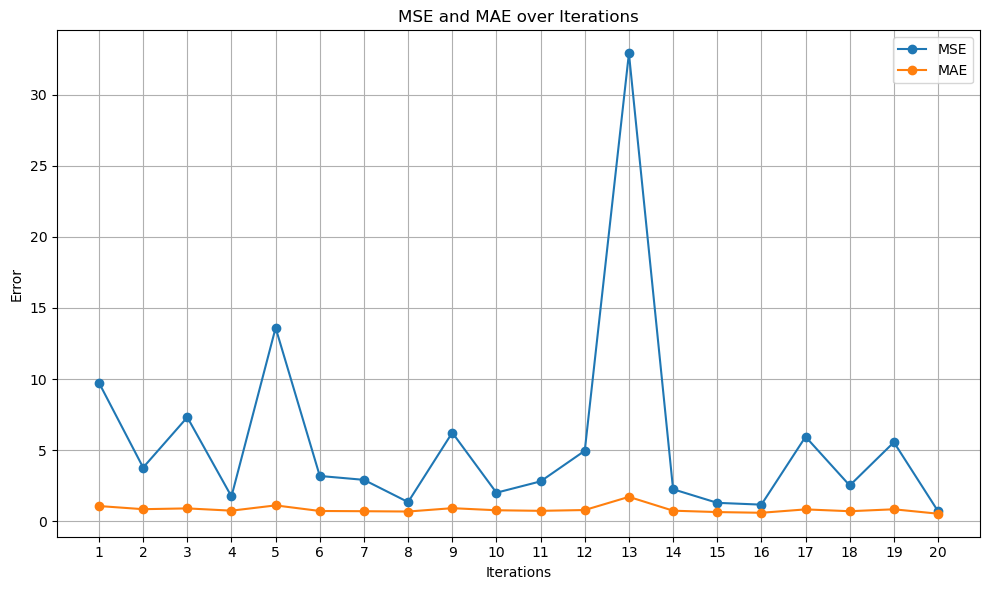

In [96]:
# Số lượng lần huấn luyện và đánh giá
num_iterations = 20
mse_list = []
mae_list = []

for i in range(num_iterations):
    # Chia dữ liệu thành tập huấn luyện và tập kiểm tra ngẫu nhiên mới
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # Tạo và huấn luyện mô hình Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Dự đoán trên tập kiểm tra
    predictions = rf_model.predict(X_test)

    # Đánh giá hiệu suất của mô hình
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)

    # Lưu kết quả vào list
    mse_list.append(mse)
    mae_list.append(mae)

# Tính giá trị trung bình của MSE và MAE
avg_mse = sum(mse_list) / num_iterations
avg_mae = sum(mae_list) / num_iterations

print(f"Average Mean Squared Error (MSE) over {num_iterations} iterations: {avg_mse}")
print(f"Average Mean Absolute Error (MAE) over {num_iterations} iterations: {avg_mae}")

# Vẽ đồ thị đường biểu diễn MSE và MAE
plt.figure(figsize=(10, 6))

plt.plot(range(1, num_iterations + 1), mse_list, label='MSE', marker='o')
plt.plot(range(1, num_iterations + 1), mae_list, label='MAE', marker='o')

plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('MSE and MAE over Iterations')
plt.xticks(range(1, num_iterations + 1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Sử dụng CROSS-VALIDATION

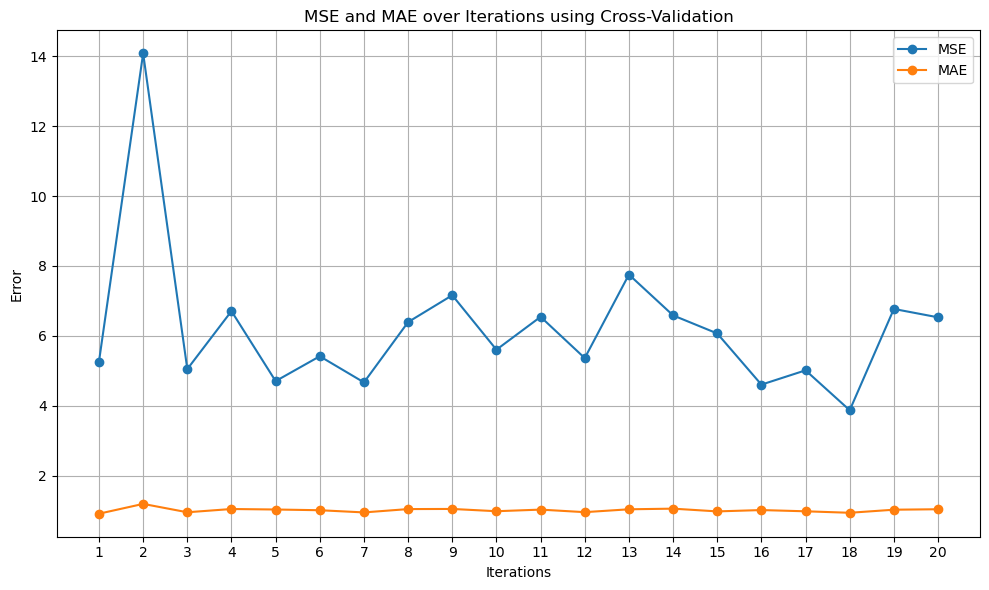

In [97]:
from sklearn.model_selection import cross_val_score

# Số lượng lần cross-validation
num_iterations = 20
mse_list = []
mae_list = []

# Khởi tạo mô hình RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

for i in range(num_iterations):
    # Chia dữ liệu thành tập huấn luyện và tập kiểm tra ngẫu nhiên mới
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # Thực hiện cross-validation trên mô hình RandomForestRegressor
    mse_scores = -cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

    # Tính trung bình các điểm số MSE và MAE
    avg_mse = mse_scores.mean()
    avg_mae = mae_scores.mean()

    # Lưu kết quả vào list
    mse_list.append(avg_mse)
    mae_list.append(avg_mae)

# Vẽ đồ thị đường biểu diễn MSE và MAE
plt.figure(figsize=(10, 6))

plt.plot(range(1, num_iterations + 1), mse_list, label='MSE', marker='o')
plt.plot(range(1, num_iterations + 1), mae_list, label='MAE', marker='o')

plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('MSE and MAE over Iterations using Cross-Validation')
plt.xticks(range(1, num_iterations + 1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Sử dụng Early Stopping form Scratch

Stopped training at iteration 36, validation MSE: 0.6303649159663852
Test MSE: 0.27941250000000045


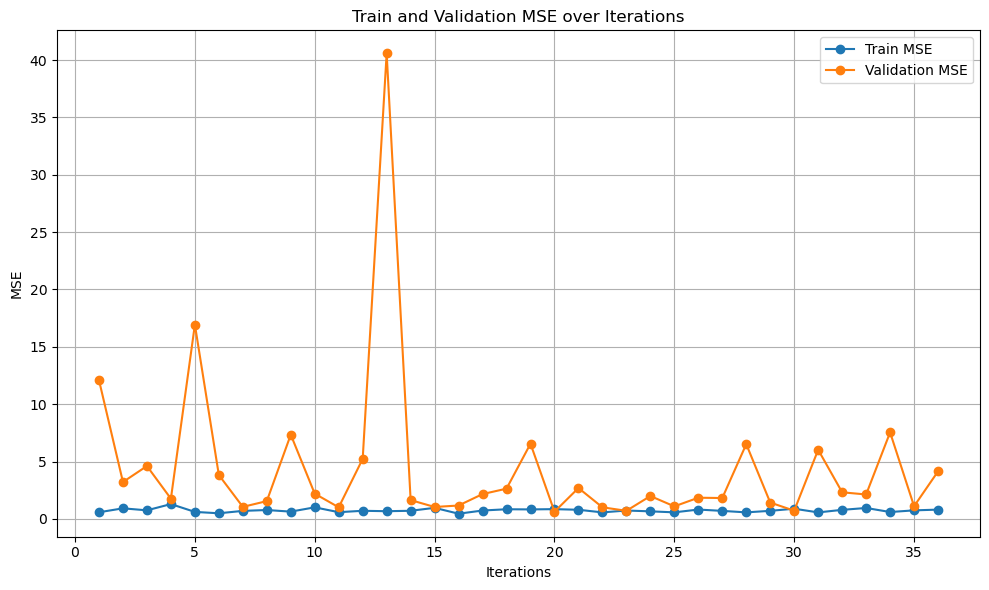

In [98]:
train_mse_list = []  # Lưu MSE trên tập huấn luyện
val_mse_list = []    # Lưu MSE trên tập validation

best_score = float('inf')  # Giữ giá trị hiệu suất tốt nhất trên tập validation
best_model = None  # Lưu mô hình có hiệu suất tốt nhất

no_improvement_count = 0  # Đếm số lần không cải thiện hiệu suất
max_no_improvement = 15  # Số lần không cải thiện tối đa trước khi dừng


for i in range(100):  # Số lần huấn luyện tối đa (có thể thay đổi)
    # Chia dữ liệu thành tập huấn luyện và tập kiểm tra ngẫu nhiên mới
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=i)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=i)
    # Tạo và huấn luyện mô hình Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    rf_model.fit(X_train, y_train)

    # Đánh giá hiệu suất trên tập huấn luyện và validation
    train_predictions = rf_model.predict(X_train)
    train_mse = mean_squared_error(y_train, train_predictions)
    val_predictions = rf_model.predict(X_val)
    val_mse = mean_squared_error(y_val, val_predictions)
    
    train_mse_list.append(train_mse)
    val_mse_list.append(val_mse)

    if val_mse < best_score:
        best_score = val_mse
        best_model = rf_model
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    if no_improvement_count > max_no_improvement:
        print(f"Stopped training at iteration {i + 1}, validation MSE: {best_score}")
        break

# Đánh giá trên tập kiểm tra
test_predictions = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
print(f"Test MSE: {test_mse}")

# Vẽ biểu đồ MSE trên tập huấn luyện và validation qua các vòng lặp
plt.figure(figsize=(10, 6))

plt.plot(range(1, len(train_mse_list) + 1), train_mse_list, label='Train MSE', marker='o')
plt.plot(range(1, len(val_mse_list) + 1), val_mse_list, label='Validation MSE', marker='o')

plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('Train and Validation MSE over Iterations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Random Forest using Grid search CV

In [99]:
# Tạo ra một dictionary chứa các hyperparameters và các giá trị tương ứng để thử nghiệm
tuned_parameters = [{'n_estimators': [70, 100],
                     'min_samples_split': [10, 20],
                     'max_depth': [8, 12]
                    }]

# Khởi tạo mô hình RandomForestRegressor
rf_reg_CV = RandomForestRegressor(random_state=10)

# Tạo grid search cross-validation
grid = GridSearchCV(estimator=rf_reg_CV, 
                    param_grid=tuned_parameters, 
                    cv=10)

# Huấn luyện grid search trên dữ liệu
dt_grid = grid.fit(X, y)

# Lấy ra các hyperparameters tốt nhất
print('Best parameters for random forest regressor: ', dt_grid.best_params_, '\n')

Best parameters for random forest regressor:  {'max_depth': 12, 'min_samples_split': 10, 'n_estimators': 70} 



In [100]:
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
dt_grid_model = RandomForestRegressor(n_estimators = dt_grid.best_params_.get('n_estimators'),
                                       max_depth = dt_grid.best_params_.get('max_depth'),
                                       #max_leaf_nodes = dt_grid.best_params_.get('max_leaf_nodes'),
                                       #min_samples_leaf = dt_grid.best_params_.get('min_samples_leaf'),
                                       min_samples_split = dt_grid.best_params_.get('min_samples_split'),
                                       random_state = 10)

# use fit() to fit the model on the train set
dt_grid_model = dt_grid_model.fit(X_train, y_train)
# predict the class labels using 'X_test'
y_pred_grid = dt_grid_model.predict(X_test)
y_pred_grid

array([ 95.9714949 , 132.42677955,  86.91596308,  85.32731707,
        86.54379002,  70.60108994,  69.5679097 ,  52.8959309 ,
        50.71505539,  97.82964297,  90.10859383,  71.4512211 ,
       106.39678987,  63.46372952,  54.01003802,  63.63619877,
       123.53469784, 106.90829371,  76.98365506,  32.00271642,
        81.97291188, 153.52141938,  66.32894122, 140.09640859,
        81.69314709, 146.30105677,  65.70235596,  42.42561279,
        91.09891145,  67.13842062])

In [102]:
# calculate MAE
rf_reg_CV_MAE = mean_absolute_error(y_test, y_pred_grid)
print('Mean Absolute Error (MAE):', rf_reg_CV_MAE)
                                         
# calculate MSE
rf_reg_CV_MSE = mean_squared_error(y_test, y_pred_grid)
print('Mean Squared Error (MSE):', rf_reg_CV_MSE)
                                         
# calculate RMSE
rf_reg_CV_RMSE = np.sqrt(mean_squared_error(y_test, y_pred_grid))
print('Root Mean Squared Error (RMSE):', rf_reg_CV_RMSE)

Mean Absolute Error (MAE): 1.0847686839120336
Mean Squared Error (MSE): 2.914551034305389
Root Mean Squared Error (RMSE): 1.7072056215656592


Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for eac

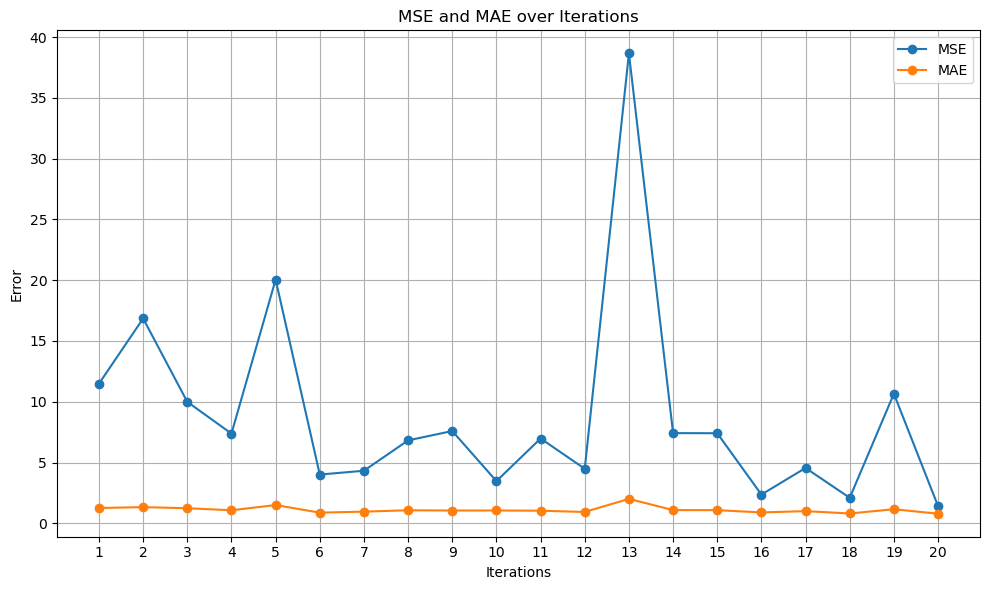

In [103]:
# Số lượng lần huấn luyện và đánh giá
num_iterations = 20
mse_list = []
mae_list = []

for i in range(num_iterations):
    # Chia dữ liệu thành tập huấn luyện và tập kiểm tra ngẫu nhiên mới
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # create a dictionary with hyperparameters and its values
    tuned_parameters = [{'n_estimators': [70, 100],
                     'min_samples_split': [10, 20],
                     'max_depth': [8, 12]
                    }]

    # instantiate the RandomForestRegressor
    rf_reg_CV = RandomForestRegressor(random_state=10)

    # use GridSearchCV() to find the optimal value of the hyperparameters
    grid = GridSearchCV(estimator=rf_reg_CV, 
                        param_grid=tuned_parameters, 
                        cv=10, 
                        scoring='neg_mean_squared_error', 
                        verbose=1, 
                        n_jobs=-1)


    # fit the model on the entire dataset using fit()
    grid.fit(X_train, y_train)

    # get the best parameters and best model
    best_rf_model = grid.best_estimator_

    # make predictions
    predictions = best_rf_model.predict(X_test)

    # calculate and store MSE, MAE
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)

    mse_list.append(mse)
    mae_list.append(mae)

# Tính trung bình của các metric trên các lần huấn luyện khác nhau
avg_mse = sum(mse_list) / num_iterations
avg_mae = sum(mae_list) / num_iterations

print(f"Average Mean Squared Error (MSE) over {num_iterations} iterations: {avg_mse}")
print(f"Average Mean Absolute Error (MAE) over {num_iterations} iterations: {avg_mae}")

# Vẽ đồ thị đường biểu diễn MSE và MAE
plt.figure(figsize=(10, 6))

plt.plot(range(1, num_iterations + 1), mse_list, label='MSE', marker='o')
plt.plot(range(1, num_iterations + 1), mae_list, label='MAE', marker='o')

plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('MSE and MAE over Iterations')
plt.xticks(range(1, num_iterations + 1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

AdaBoost

Average Mean Squared Error: 4.263489932885905
Average Mean Absolute Error: 0.6097986577181206
Average R-squared Score: 0.0


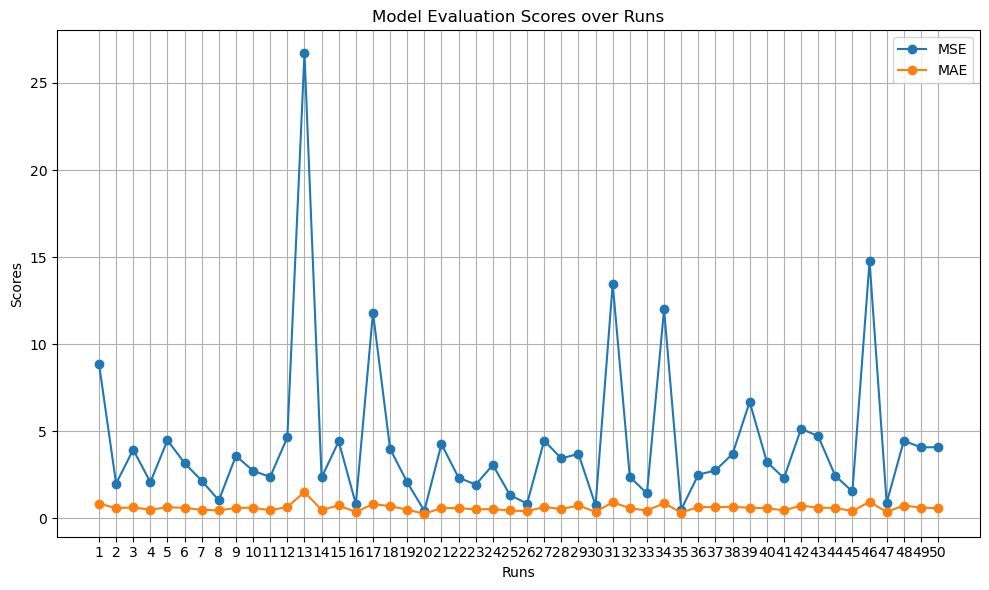

In [104]:
# Số lần huấn luyện và đánh giá mô hình
n_runs = 50
all_scores = {'MSE': [], 'MAE': [], 'R-squared': []}

for i in range(n_runs):
    # Chia dữ liệu thành tập huấn luyện và tập kiểm tra mới mỗi lần lặp
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # Khởi tạo mô hình AdaBoostRegressor
    adaboost = AdaBoostRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, learning_rate=1.0, random_state=1)

    # Huấn luyện mô hình trên tập huấn luyện
    adaboost.fit(X_train, y_train)

    # Dự đoán trên tập kiểm tra
    y_pred = adaboost.predict(X_test)

    # Đánh giá mô hình và lưu các metric vào all_scores
    all_scores['MSE'].append(mean_squared_error(y_test, y_pred))
    all_scores['MAE'].append(mean_absolute_error(y_test, y_pred))
    # all_scores['R-squared'].append(r2_score(y_test, y_pred))

# Tính trung bình các metric sau n lần huấn luyện và đánh giá
avg_scores = {metric: sum(scores) / n_runs for metric, scores in all_scores.items()}

print("Average Mean Squared Error:", avg_scores['MSE'])
print("Average Mean Absolute Error:", avg_scores['MAE'])
print("Average R-squared Score:", avg_scores['R-squared'])
# Vẽ đồ thị biểu diễn số lần huấn luyện và đánh giá mô hình
plt.figure(figsize=(10, 6))

plt.plot(range(1, n_runs + 1), all_scores['MSE'], label='MSE', marker='o')
plt.plot(range(1, n_runs + 1), all_scores['MAE'], label='MAE', marker='o')

plt.xlabel('Runs')
plt.ylabel('Scores')
plt.title('Model Evaluation Scores over Runs')
plt.xticks(range(1, n_runs + 1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Sử dụng Cross-validation

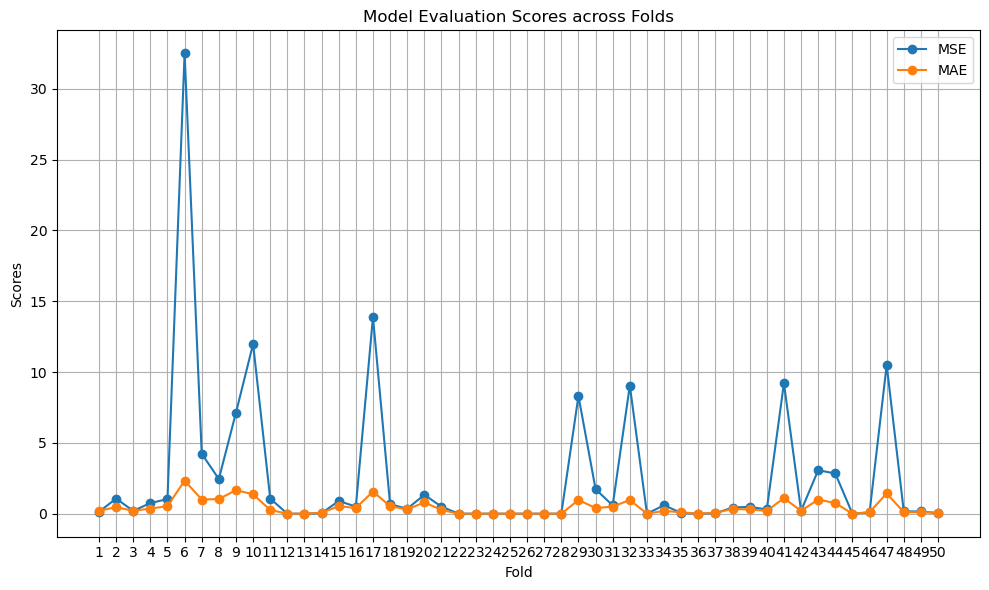

In [105]:
# Khởi tạo mô hình AdaBoostRegressor
adaboost = AdaBoostRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, learning_rate=1.0, random_state=1)

# Số lượng fold cross-validation
num_folds = 50

# Đánh giá mô hình bằng cross-validation
mse_scores = cross_val_score(adaboost, X, y, cv=num_folds, scoring='neg_mean_squared_error')
mae_scores = cross_val_score(adaboost, X, y, cv=num_folds, scoring='neg_mean_absolute_error')

# Chuyển đổi các điểm số từ negative sang positive
mse_scores = -mse_scores
mae_scores = -mae_scores

# Vẽ đồ thị biểu diễn kết quả của MSE và MAE
plt.figure(figsize=(10, 6))

plt.plot(np.arange(1, num_folds + 1), mse_scores, label='MSE', marker='o')
plt.plot(np.arange(1, num_folds + 1), mae_scores, label='MAE', marker='o')

plt.xlabel('Fold')
plt.ylabel('Scores')
plt.title('Model Evaluation Scores across Folds')
plt.xticks(np.arange(1, num_folds + 1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Sử dụng early stopping để dừng việc huấn luyện mô hình khi trải qua 5 vòng lặp không có sự tiến triển

Stopped training at iteration 14, validation MSE: 1.0385906040268456


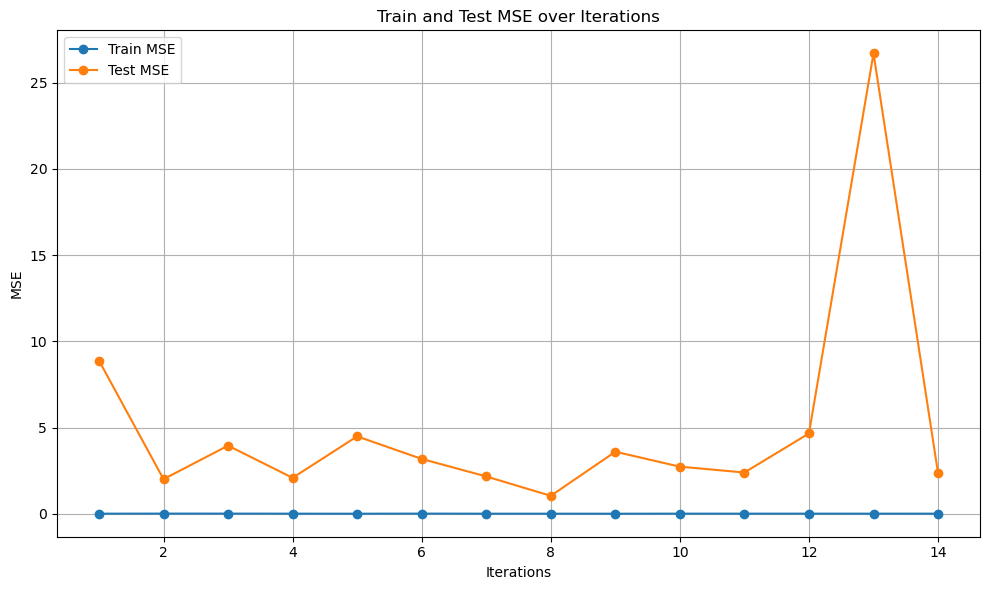

In [107]:
# Lưu trữ MSE trên tập huấn luyện và tập kiểm tra
train_errors = []
test_errors = []
best_score = float('inf')  # Giữ giá trị hiệu suất tốt nhất trên tập validation

# Số lượng vòng lặp
n_iterations = 50

no_improvement_count = 0  # Đếm số lần không cải thiện hiệu suất
max_no_improvement = 5  # Số lần không cải thiện tối đa trước khi dừng

for i in range(n_iterations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
        
    # Khởi tạo mô hình AdaBoostRegressor
    adaboost = AdaBoostRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, learning_rate=1.0, random_state=1)
    
    # Huấn luyện mô hình
    adaboost.fit(X_train, y_train)

    # Dự đoán trên tập huấn luyện
    y_train_pred = adaboost.predict(X_train)
    train_error = mean_squared_error(y_train, y_train_pred)
    train_errors.append(train_error)

    # Dự đoán trên tập kiểm tra
    y_test_pred = adaboost.predict(X_test)
    test_error = mean_squared_error(y_test, y_test_pred)
    test_errors.append(test_error)

    if test_error < best_score:
        best_score = test_error
        no_improvement_count = 0
    else:
        no_improvement_count += 1
    
    if no_improvement_count > max_no_improvement:
        print(f"Stopped training at iteration {i + 1}, validation MSE: {best_score}")
        break

# Vẽ đồ thị biểu diễn số lần huấn luyện và đánh giá mô hình
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_errors) + 1), train_errors, label='Train MSE', marker='o')
plt.plot(range(1, len(test_errors) + 1), test_errors, label='Test MSE', marker='o')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('Train and Test MSE over Iterations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Gradient Boosting

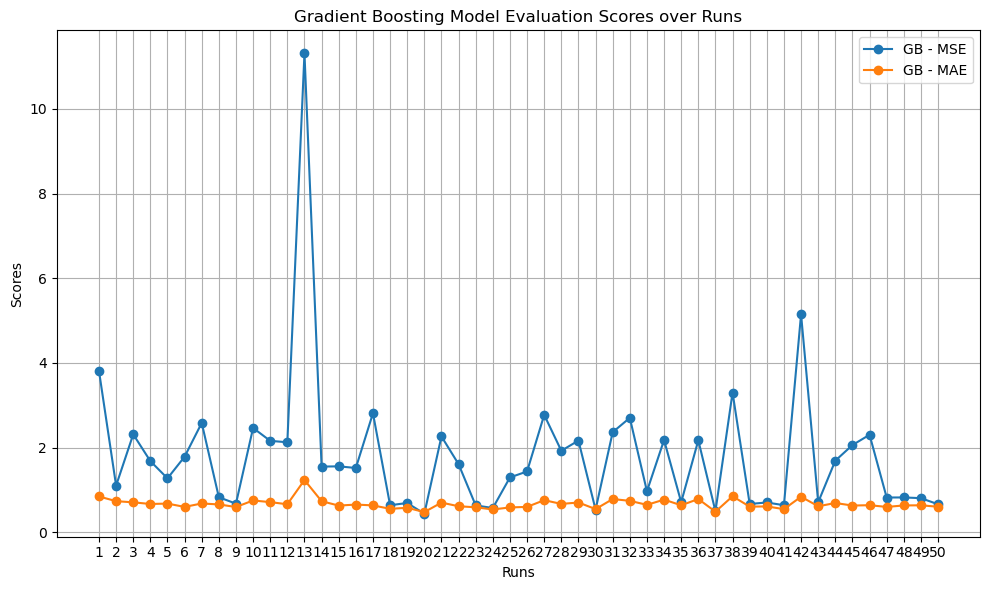

In [108]:
n_runs = 50
gb_all_scores = {'MSE': [], 'MAE': [], 'R-squared': []}

for i in range(n_runs):
    # Chia dữ liệu thành tập huấn luyện và tập kiểm tra mới mỗi lần lặp
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # Khởi tạo mô hình GradientBoostingRegressor
    gradient_boost = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

    # Huấn luyện mô hình trên tập huấn luyện
    gradient_boost.fit(X_train, y_train)

    # Dự đoán trên tập kiểm tra
    y_pred = gradient_boost.predict(X_test)

    # Đánh giá mô hình và lưu các metric vào gb_all_scores
    gb_all_scores['MSE'].append(mean_squared_error(y_test, y_pred))
    gb_all_scores['MAE'].append(mean_absolute_error(y_test, y_pred))
    gb_all_scores['R-squared'].append(r2_score(y_test, y_pred))

# Vẽ đồ thị biểu diễn số lần huấn luyện và đánh giá mô hình Gradient Boosting
plt.figure(figsize=(10, 6))

plt.plot(range(1, n_runs + 1), gb_all_scores['MSE'], label='GB - MSE', marker='o')
plt.plot(range(1, n_runs + 1), gb_all_scores['MAE'], label='GB - MAE', marker='o')

plt.xlabel('Runs')
plt.ylabel('Scores')
plt.title('Gradient Boosting Model Evaluation Scores over Runs')
plt.xticks(range(1, n_runs + 1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

sử dụng Cross-validation

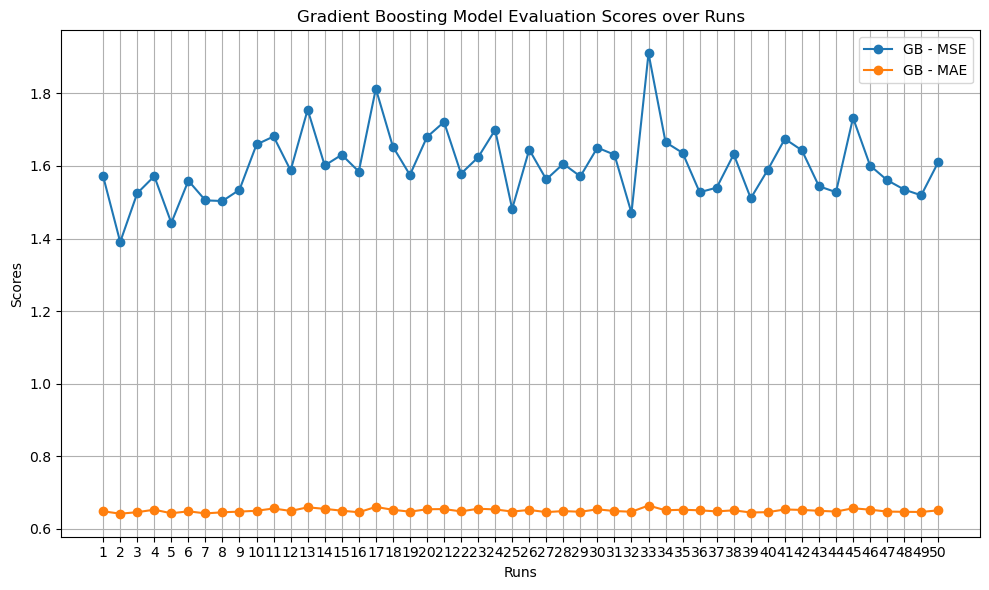

In [109]:
from sklearn.model_selection import KFold

n_runs = 50
gb_all_scores = {'MSE': [], 'MAE': []}

kf = KFold(n_splits=5, random_state=42, shuffle=True)

for i in range(n_runs):
    mse_scores = []  # Lưu trữ MSE cho mỗi fold
    mae_scores = []  # Lưu trữ MAE cho mỗi fold
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Khởi tạo mô hình GradientBoostingRegressor
        gradient_boost = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=i)

        # Huấn luyện mô hình trên tập huấn luyện
        gradient_boost.fit(X_train, y_train)

        # Dự đoán trên tập kiểm tra
        y_pred = gradient_boost.predict(X_test)

        # Tính toán và lưu trữ các điểm số
        mse_scores.append(mean_squared_error(y_test, y_pred))
        mae_scores.append(mean_absolute_error(y_test, y_pred))

    # Lưu trữ điểm số trung bình sau mỗi lần chạy
    gb_all_scores['MSE'].append(sum(mse_scores) / len(mse_scores))
    gb_all_scores['MAE'].append(sum(mae_scores) / len(mae_scores))

# Vẽ đồ thị biểu diễn số lần huấn luyện và đánh giá mô hình Gradient Boosting
plt.figure(figsize=(10, 6))

plt.plot(range(1, n_runs + 1), gb_all_scores['MSE'], label='GB - MSE', marker='o')
plt.plot(range(1, n_runs + 1), gb_all_scores['MAE'], label='GB - MAE', marker='o')

plt.xlabel('Runs')
plt.ylabel('Scores')
plt.title('Gradient Boosting Model Evaluation Scores over Runs')
plt.xticks(range(1, n_runs + 1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


điều chỉnh các siêu tham số trong Gradient Boosting để giảm overfitting bằng cách sử dụng regularization

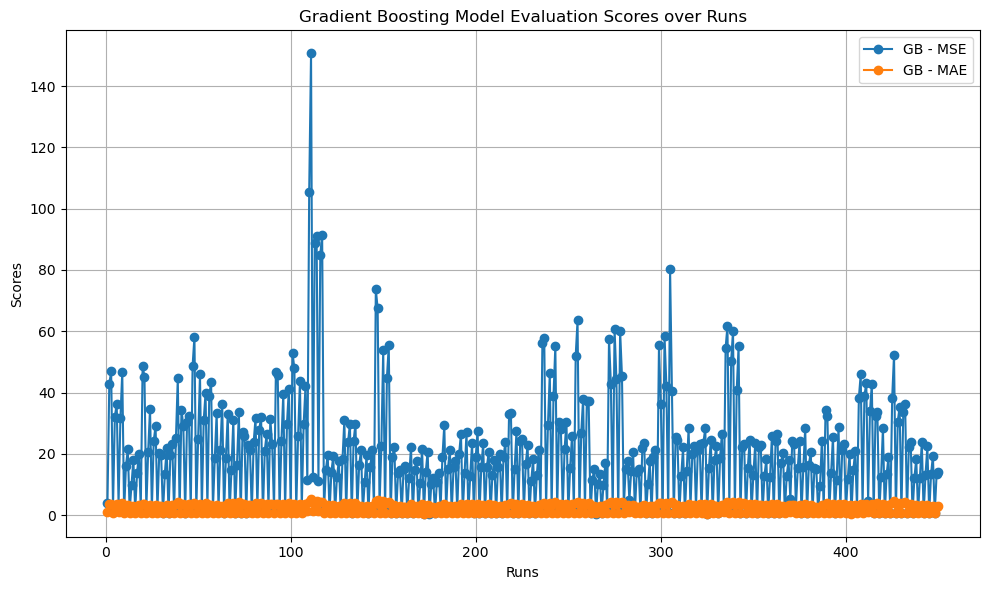

In [110]:
n_runs = 50
gb_all_scores = {'MSE': [], 'MAE': [], 'R-squared': []}

n_estimators = 100
learning_rate = 0.1
subsample_values = [1.0, 0.8, 0.6]
max_features_values = [None, 'sqrt', 'log2']  # Use None instead of 'auto'

for i in range(n_runs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    for subsample in subsample_values:
        for max_features in max_features_values:
            gradient_boost = GradientBoostingRegressor(
                n_estimators=n_estimators, 
                learning_rate=learning_rate, 
                subsample=subsample,
                max_features=max_features,
                random_state=42
            )
            gradient_boost.fit(X_train, y_train)
            y_pred = gradient_boost.predict(X_test)

            gb_all_scores['MSE'].append(mean_squared_error(y_test, y_pred))
            gb_all_scores['MAE'].append(mean_absolute_error(y_test, y_pred))
            gb_all_scores['R-squared'].append(r2_score(y_test, y_pred))

# Plotting the evaluation scores
plt.figure(figsize=(10, 6))

plt.plot(range(1, len(gb_all_scores['MSE']) + 1), gb_all_scores['MSE'], label='GB - MSE', marker='o')
plt.plot(range(1, len(gb_all_scores['MAE']) + 1), gb_all_scores['MAE'], label='GB - MAE', marker='o')

plt.xlabel('Runs')
plt.ylabel('Scores')
plt.title('Gradient Boosting Model Evaluation Scores over Runs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

HistGradientBoosting
một biến thể tối ưu hóa của Gradient Boosting, sử dụng histogram để tăng tốc độ và giảm bộ nhớ tiêu tốn.

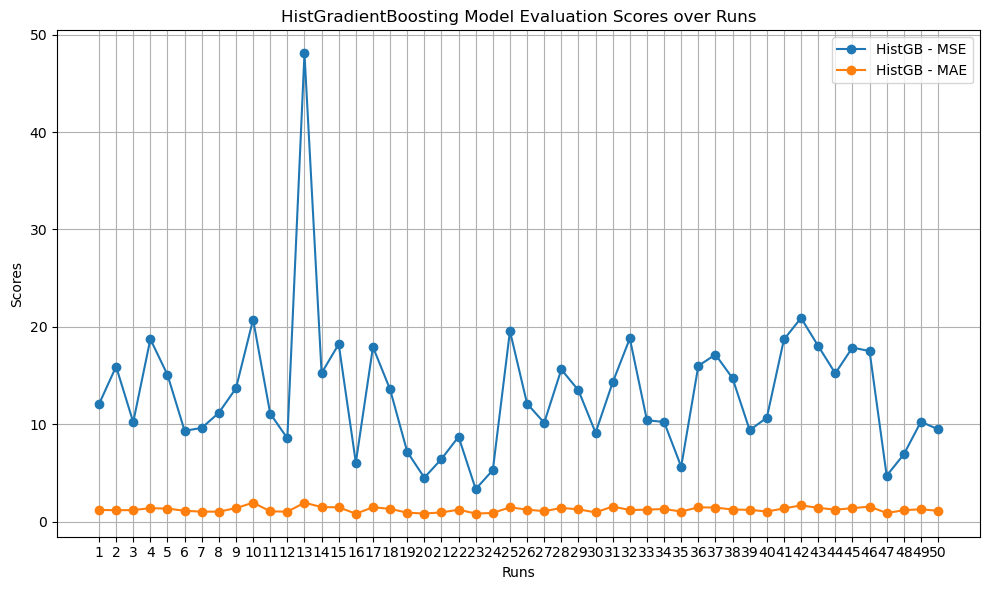

In [111]:
n_runs = 50
hist_gb_all_scores = {'MSE': [], 'MAE': [], 'R-squared': []}

for i in range(n_runs):
    # Chia dữ liệu thành tập huấn luyện và tập kiểm tra mới mỗi lần lặp
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # Khởi tạo mô hình HistGradientBoostingRegressor
    hist_gradient_boost = HistGradientBoostingRegressor(max_iter=100, learning_rate=0.1, random_state=42)

    # Huấn luyện mô hình trên tập huấn luyện
    hist_gradient_boost.fit(X_train, y_train)

    # Dự đoán trên tập kiểm tra
    y_pred = hist_gradient_boost.predict(X_test)

    # Đánh giá mô hình và lưu các metric vào hist_gb_all_scores
    hist_gb_all_scores['MSE'].append(mean_squared_error(y_test, y_pred))
    hist_gb_all_scores['MAE'].append(mean_absolute_error(y_test, y_pred))
    hist_gb_all_scores['R-squared'].append(r2_score(y_test, y_pred))

# Vẽ đồ thị biểu diễn số lần huấn luyện và đánh giá mô hình HistGradientBoostingRegressor
plt.figure(figsize=(10, 6))

plt.plot(range(1, n_runs + 1), hist_gb_all_scores['MSE'], label='HistGB - MSE', marker='o')
plt.plot(range(1, n_runs + 1), hist_gb_all_scores['MAE'], label='HistGB - MAE', marker='o')

plt.xlabel('Runs')
plt.ylabel('Scores')
plt.title('HistGradientBoosting Model Evaluation Scores over Runs')
plt.xticks(range(1, n_runs + 1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



K-fold cross-validation

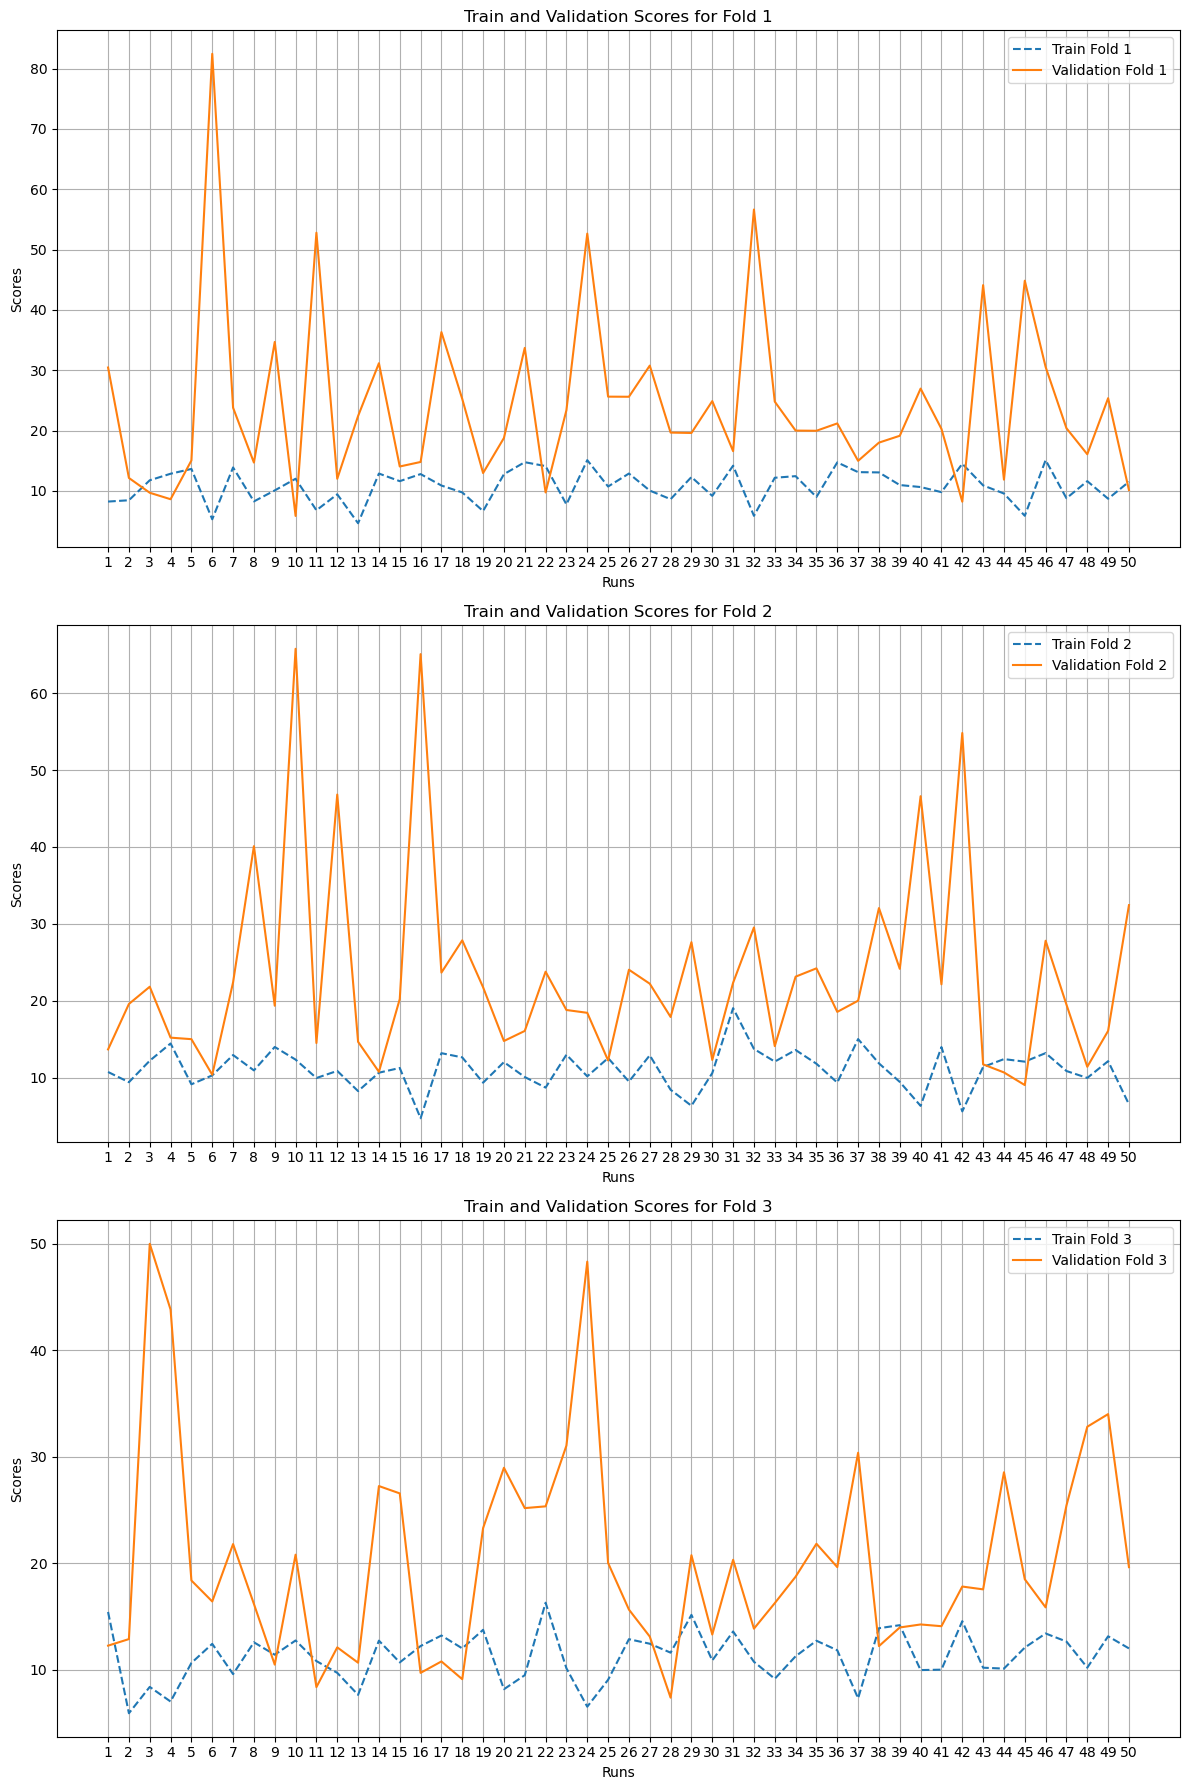

In [112]:
n_runs = 50
n_splits = 3
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

train_scores = []  # Lưu trữ train scores cho mỗi fold
val_scores = []    # Lưu trữ validation scores cho mỗi fold

plt.figure(figsize=(12, 6 * n_splits))

for fold in range(n_splits):
    train_scores_fold = []  # Lưu trữ train scores của fold hiện tại
    val_scores_fold = []    # Lưu trữ validation scores của fold hiện tại

    for i in range(n_runs):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

        train_index, test_index = list(kf.split(X_train))[fold]
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        hist_gradient_boost = HistGradientBoostingRegressor(max_iter=100, learning_rate=0.1, random_state=42)
        hist_gradient_boost.fit(X_train_fold, y_train_fold)

        y_train_pred = hist_gradient_boost.predict(X_train_fold)
        train_scores_fold.append(mean_squared_error(y_train_fold, y_train_pred))

        y_val_pred = hist_gradient_boost.predict(X_val_fold)
        val_scores_fold.append(mean_squared_error(y_val_fold, y_val_pred))

    train_scores.append(train_scores_fold)
    val_scores.append(val_scores_fold)

    plt.subplot(n_splits, 1, fold + 1)
    plt.plot(range(1, n_runs + 1), train_scores_fold, label=f'Train Fold {fold + 1}', linestyle='--')
    plt.plot(range(1, n_runs + 1), val_scores_fold, label=f'Validation Fold {fold + 1}')

    plt.xlabel('Runs')
    plt.ylabel('Scores')
    plt.title(f'Train and Validation Scores for Fold {fold + 1}')
    plt.xticks(range(1, n_runs + 1))
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()



sử dụng regularization trong HistGradientBoostingRegressor
sử dụng các siêu tham số như l2_regularization, max_leaf_nodes, max_depth, và min_samples_leaf

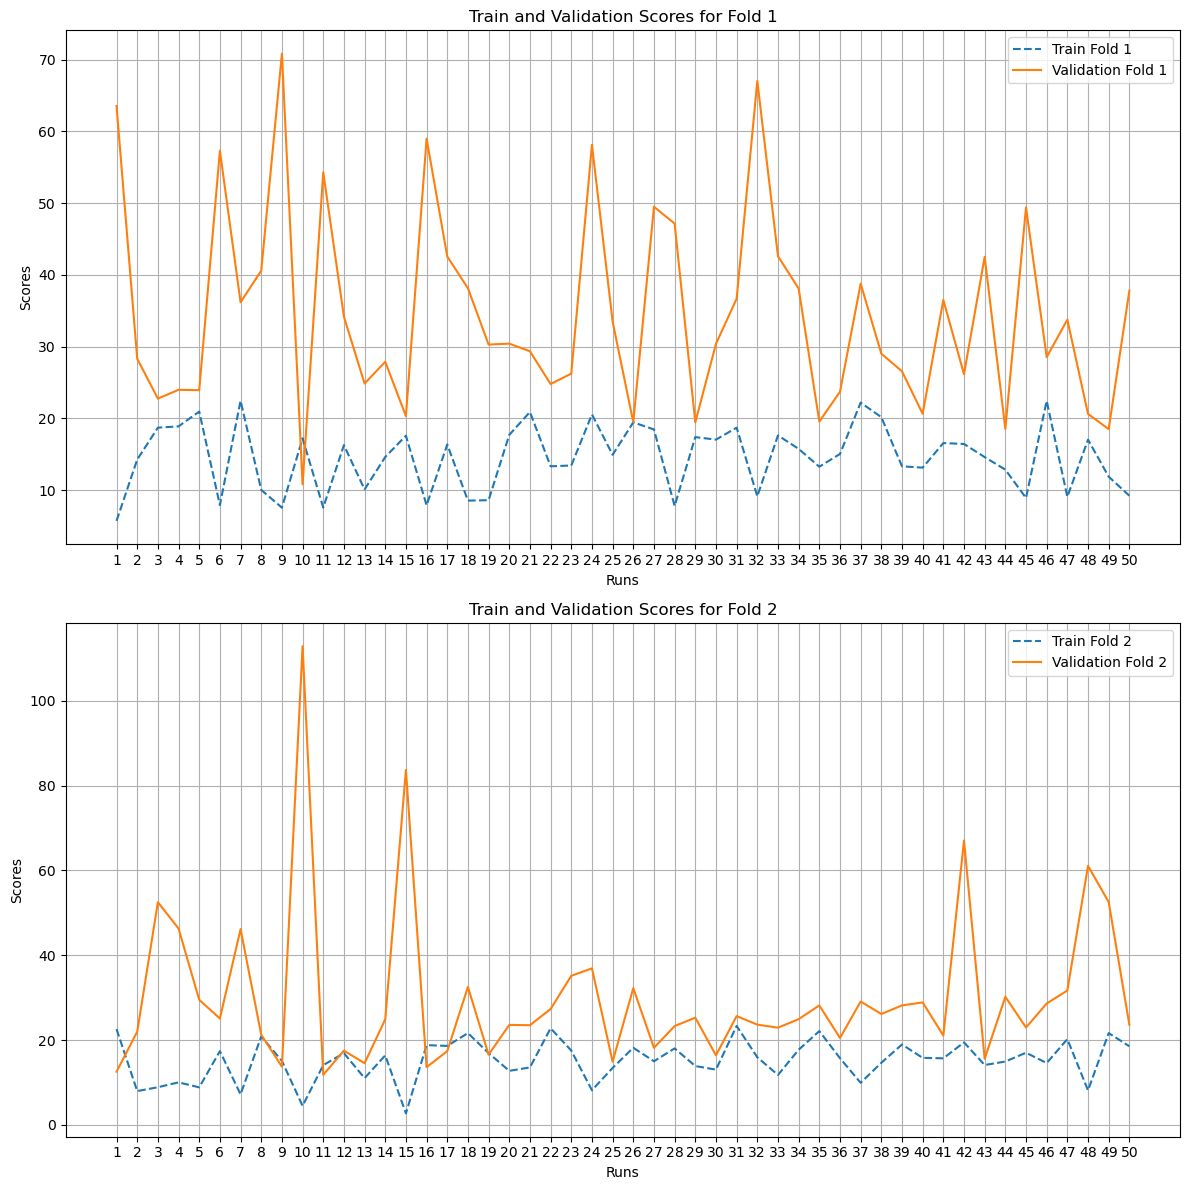

In [113]:
n_runs = 50
n_splits = 2
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

train_scores = []  # Lưu trữ train scores cho mỗi fold
val_scores = []    # Lưu trữ validation scores cho mỗi fold

l2_regularization = 0.1
max_leaf_nodes = 31
max_depth = None  # Hoặc đặt giá trị tối đa cho độ sâu cây
min_samples_leaf = 20

plt.figure(figsize=(12, 6 * n_splits))

for fold in range(n_splits):
    train_scores_fold = []  # Lưu trữ train scores của fold hiện tại
    val_scores_fold = []    # Lưu trữ validation scores của fold hiện tại

    for i in range(n_runs):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

        train_index, test_index = list(kf.split(X_train))[fold]
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        hist_gradient_boost = HistGradientBoostingRegressor(
            max_iter=100, learning_rate=0.1, random_state=42,
            l2_regularization=l2_regularization,
            max_leaf_nodes=max_leaf_nodes,
            max_depth=max_depth,
            min_samples_leaf=min_samples_leaf
        )
        hist_gradient_boost.fit(X_train_fold, y_train_fold)

        y_train_pred = hist_gradient_boost.predict(X_train_fold)
        train_scores_fold.append(mean_squared_error(y_train_fold, y_train_pred))

        y_val_pred = hist_gradient_boost.predict(X_val_fold)
        val_scores_fold.append(mean_squared_error(y_val_fold, y_val_pred))

    train_scores.append(train_scores_fold)
    val_scores.append(val_scores_fold)

    plt.subplot(n_splits, 1, fold + 1)
    plt.plot(range(1, n_runs + 1), train_scores_fold, label=f'Train Fold {fold + 1}', linestyle='--')
    plt.plot(range(1, n_runs + 1), val_scores_fold, label=f'Validation Fold {fold + 1}')

    plt.xlabel('Runs')
    plt.ylabel('Scores')
    plt.title(f'Train and Validation Scores for Fold {fold + 1}')
    plt.xticks(range(1, n_runs + 1))
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


3 Sử dụng Feed Forward Neural Network và Reccurent Neural Network (hoặc mô thuộc loại này) để giải quyết bài toán và các kỹ thuật tránh overfitting trong FFNN và RNN

Feed Forward Neural Network để giải quyết bài toán và các kỹ thuật tránh overfitting trong FFNN

In [114]:
fnnn_data = df
name = list(fnnn_data.columns)
types = fnnn_data.dtypes

In [115]:
#data transformation
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in range(len(types)):
    if types[i] =='object':
        le.fit_transform(fnnn_data[name[i]])
        fnnn_data[name[i]] = le.transform(fnnn_data[name[i]])
print("Data transformation")
data = fnnn_data.values
print(data[:2])

Data transformation
[[0.000e+00 6.900e+01 1.800e+02 1.260e+02 3.800e+00 2.940e+02 3.000e+00
  7.200e+01 5.000e+00 1.973e+03 1.000e+00 3.000e+00 2.000e+00 9.000e+00
  0.000e+00 0.000e+00 0.000e+00 5.300e+01 9.100e+01 7.200e+01 2.940e+02
  2.400e+01 4.800e+01 1.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
  1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  1.000e+00 0.000e+00 0.000e+00 0.000e+00 5.000e+00 1.000e+00 0.000e+00]
 [1.000e+00 1.060e+02 2.350e+02 4.400e+02 3.400e+00 3.200e+02 9.900e+01
  1.200e+01 1.000e+00 1.984e+03 6.000e+00 2.800e+01 1.200e+01 5.000e+00
  0.000e+00 0.000e+00 0.000e+00 6.300e+01 1.120e+02 8.750e+01 3.200e+02
  1.700e+01 3.700e+01 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 5.000e+00 1.000e+00 0.000e+00]]


In [116]:
X = data[:,:-1]
y = data[:,-1]
print(X.shape)
print(y.shape)

(742, 41)
(742,)


In [117]:
#data normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X= scaler.transform(X)
print(X[0])

[0.         0.26235741 0.43373494 0.27272727 0.8        0.85964912
 0.01507538 0.36548223 0.71428571 0.97722772 0.125      0.05084746
 0.08333333 0.75       0.         0.         0.         0.20320856
 0.25862069 0.23689727 0.85964912 0.66666667 0.17625899 1.
 0.         0.         1.         0.         1.         0.
 0.         0.         0.         0.         1.         1.
 0.         0.         0.         0.55555556 0.5       ]


In [118]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.33, random_state=42)

# Chia tập temp thành tập validation và tập kiểm thử
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

In [119]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)

print(y_train[:2])

[[1. 0. 0.]
 [0. 0. 1.]]


In [120]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Xây dựng mô hình FFNN
model = Sequential()
y_val_encoded = to_categorical(y_val, num_classes=3) #Chuyển Đổi Nhãn Lớp Sang Dạng One-Hot Encoding:

# Thêm các layer cho mô hình
model.add(Dense(units=128, activation='relu', input_dim=X.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=3, activation='softmax'))  # Sử dụng 'softmax' vì đây là bài toán phân loại nhị phân

# Biên dịch mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# In thông tin mô hình
model.summary()

model.fit(X_train, y_train, epochs=100,batch_size=10,verbose=2,validation_data=(X_val, y_val_encoded))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               5376      
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 3)                 195       
                                                                 
Total params: 13827 (54.01 KB)
Trainable params: 13827 (54.01 KB)
Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________
Epoch 1/100
50/50 - 1s - loss: 0.9835 - accuracy: 0.4869 - val_loss: 1.0491 - val_accuracy: 0.4268 - 640ms/epoch - 13ms/step
Epoch 2/100
50/50 - 0s - loss: 0.8747 - accuracy: 0.5895 - val_loss: 0.9374 - val_accuracy: 0.5244 - 73ms/epoch - 1ms/step
Epoch 3/100
50/50 - 0s - loss: 0.8063 - accuracy: 0.6217 - val_loss: 0.8880 - val_accuracy: 0.5549 - 70ms/epoch - 1ms/step
Epoch 4/100
50/50 - 0s - loss: 0.7603 - accuracy: 0.6499 - val_loss: 0.8444 - val_accuracy: 0.6037 - 72ms/epoch - 1ms/step
Epoch 5/100
50/50 - 0s - loss: 0.6994 - accuracy: 0.6901 - val_loss: 0.8483 - val_accuracy: 0.6220 - 74ms/epoch - 1ms/step
Epoch 6/100
50/50 - 0s - loss: 0.6587 - accuracy: 0.7082 - val_loss: 0.8133 - val_accuracy: 0.6159 - 74ms/epoch - 1ms/step
Epoch 7/100
50/50 - 0s - loss: 0.6288 - accuracy: 0.7284 - val_loss: 0.8064 - val_accuracy: 0.6159 - 73ms/epoch - 1ms/step
Epoch 8/100
50/50 - 0s - loss: 0.6107 - accuracy: 0.7103 - val_loss: 0.

In [121]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

#Áp dụng dropout với tỷ lệ là 0.5. 
#Điều này có nghĩa là mỗi lần huấn luyện, mỗi nơ-ron trong lớp LSTM đầu tiên có 50% cơ hội bị "tắt" (được đặt giá trị 0) ngẫu nhiên. 
#Điều này giúp tránh overfitting bằng cách ngăn chặn mô hình phụ thuộc quá mức vào một số nơ-ron cụ thể.

# Xây dựng mô hình FFNN
model = Sequential()
y_val_encoded = to_categorical(y_val, num_classes=3)

# Thêm các layer cho mô hình
model.add(Dense(units=128, activation='relu', input_dim=X.shape[1]))
model.add(Dropout(0.5))  # Thêm Dropout layer
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))  # Thêm Dropout layer
model.add(Dense(units=3, activation='softmax')) # Sử dụng 'softmax' vì đây là bài toán phân loại

# Biên dịch mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# In thông tin mô hình
model.summary()

model.fit(X_train, y_train, epochs=100,batch_size=10,verbose=2,validation_data=(X_val, y_val_encoded))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               5376      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 3)                 195       
                                                                 
Total params: 13827 (54.01 KB)
Trainable params: 13827 (54.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
50/50 

In [122]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.regularizers import l2,l1

#Thêm một thành phần vào hàm mất mát của mô hình để giảm thiểu trọng số của các tham số. 
#L1 regularization thường thêm tổng giá trị tuyệt đối của trọng số, trong khi L2 regularization thêm tổng bình phương của trọng số. 
#Điều này giúp giảm sự phức tạp của mô hình bằng cách không cho phép trọng số có giá trị lớn quá mức.
# Xây dựng mô hình FFNN

model = Sequential()

y_val_encoded = to_categorical(y_val, num_classes=3)
#l2(0.02) và l1(0.02) là hệ số regularization, nó kiểm soát độ lớn của trọng số. 
#Giá trị của hệ số regularization quyết định mức độ ảnh hưởng của regularization đối với mô hình. 
#Trong trường hợp này, giá trị là 0.02
# Thêm các layer cho mô hình
model.add(Dense(units=128, activation='relu', input_dim=X.shape[1], kernel_regularizer=l2(0.02)))
model.add(Dense(units=64, activation='relu', kernel_regularizer=l2(0.02),activity_regularizer=l1(0.02)))
model.add(Dense(units=3, activation='softmax'))

# Biên dịch mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# In thông tin mô hình
model.summary()

model.fit(X_train, y_train, epochs=100,batch_size=10,verbose=2,validation_data=(X_val, y_val_encoded))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               5376      
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 3)                 195       
                                                                 
Total params: 13827 (54.01 KB)
Trainable params: 13827 (54.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
50/50 - 1s - loss: 3.2991 - accuracy: 0.5030 - val_loss: 2.6485 - val_accuracy: 0.4146 - 691ms/epoch - 14ms/step
Epoch 2/100
50/50 - 0s - loss: 2.1369 - accuracy: 0.5412 - val_loss: 1.8584 - val_accuracy: 0.4207 - 71ms/epoch - 1ms/step
Epoch 3/100
50/50 - 0s - loss: 1.5

In [123]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.regularizers import l2,l1
#Ta có thể kết hợp các regularization và droppout trong 1 mô hình Neural Network. Để tối ưu việc tránh overfitting khi xây dụng mô hình

# Xây dựng mô hình FFNN
model = Sequential()
y_val_encoded = to_categorical(y_val, num_classes=3)

# Thêm các layer cho mô hình
model.add(Dense(units=128, activation='relu', input_dim=X.shape[1],kernel_regularizer=l2(0.02)))
model.add(Dropout(0.5))  # Thêm Dropout layer
model.add(Dense(units=64, activation='relu', kernel_regularizer=l2(0.02),activity_regularizer=l1(0.02)))
model.add(Dropout(0.5))  # Thêm Dropout layer
model.add(Dense(units=3, activation='softmax')) # Sử dụng 'softmax' vì đây là bài toán phân loại

# Biên dịch mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# In thông tin mô hình
model.summary()

model.fit(X_train, y_train, epochs=100,batch_size=10,verbose=2,validation_data=(X_val, y_val_encoded))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               5376      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 3)                 195       
                                                                 
Total params: 13827 (54.01 KB)
Trainable params: 13827 (54.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
50/50 

In [124]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


#monitor='val_loss': Theo dõi giá trị mất mát trên tập validation (val_loss). 
#Nếu giá trị này không giảm trong khoảng kiên nhẫn (patience), quá trình huấn luyện sẽ dừng lại.
#patience=k: Khi giá trị mất mát không giảm trong k epochs liên tiếp, quá trình huấn luyện sẽ dừng lại. 
#Điều này giúp tránh việc tiếp tục huấn luyện khi mô hình đã bắt đầu overfitting.

# Xây dựng mô hình FFNN
model = Sequential()

y_val_encoded = to_categorical(y_val, num_classes=3)
# Thêm các layer cho mô hình
model.add(Dense(units=128, activation='relu', input_dim=X.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=3, activation='softmax'))  # Sử dụng 'softmax' vì đây là bài toán phân loại 

# Biên dịch mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# In thông tin mô hình
model.summary()


#Sử dụng Callback Trong model.fit:
#callbacks=[early_stopping]: chuyển đối tượng EarlyStopping vào tham số callbacks của phương thức fit.
#Khi gọi model.fit, mô hình sẽ được huấn luyện và callback EarlyStopping sẽ theo dõi giá trị mất mát trên tập validation sau mỗi epoch.
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_val, y_val_encoded), callbacks=[early_stopping],verbose = 2)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 128)               5376      
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 


 dense_23 (Dense)            (None, 3)                 195       
                                                                 
Total params: 13827 (54.01 KB)
Trainable params: 13827 (54.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
50/50 - 1s - loss: 0.9842 - accuracy: 0.5272 - val_loss: 1.0460 - val_accuracy: 0.4268 - 612ms/epoch - 12ms/step
Epoch 2/100
50/50 - 0s - loss: 0.8694 - accuracy: 0.5755 - val_loss: 0.9756 - val_accuracy: 0.4878 - 76ms/epoch - 2ms/step
Epoch 3/100
50/50 - 0s - loss: 0.7997 - accuracy: 0.6278 - val_loss: 0.9206 - val_accuracy: 0.5427 - 77ms/epoch - 2ms/step
Epoch 4/100
50/50 - 0s - loss: 0.7316 - accuracy: 0.6660 - val_loss: 0.8608 - val_accuracy: 0.5793 - 71ms/epoch - 1ms/step
Epoch 5/100
50/50 - 0s - loss: 0.6934 - accuracy: 0.6841 - val_loss: 0.9111 - val_accuracy: 0.5610 - 71ms/epoch - 1ms/step
Epoch 6/100
50/50 - 0s - loss: 0.6761 - accuracy: 0.6901 - val_loss: 0.8182 - val_a

Recurrent Nerual Network (LSTM) và các phương pháp tránh Overfitting

In [125]:
rnn_data = df
name = list(rnn_data.columns)
types = rnn_data.dtypes

In [126]:
#data transformation
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in range(len(types)):
    if types[i] =='object':
        le.fit_transform(df[name[i]])
        df[name[i]] = le.transform(df[name[i]])
print("Data transformation")
data = df.values
print(data[:2])

Data transformation
[[0.000e+00 6.900e+01 1.800e+02 1.260e+02 3.800e+00 2.940e+02 3.000e+00
  7.200e+01 5.000e+00 1.973e+03 1.000e+00 3.000e+00 2.000e+00 9.000e+00
  0.000e+00 0.000e+00 0.000e+00 5.300e+01 9.100e+01 7.200e+01 2.940e+02
  2.400e+01 4.800e+01 1.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
  1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  1.000e+00 0.000e+00 0.000e+00 0.000e+00 5.000e+00 1.000e+00 0.000e+00]
 [1.000e+00 1.060e+02 2.350e+02 4.400e+02 3.400e+00 3.200e+02 9.900e+01
  1.200e+01 1.000e+00 1.984e+03 6.000e+00 2.800e+01 1.200e+01 5.000e+00
  0.000e+00 0.000e+00 0.000e+00 6.300e+01 1.120e+02 8.750e+01 3.200e+02
  1.700e+01 3.700e+01 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 5.000e+00 1.000e+00 0.000e+00]]


In [127]:
X = data[:,:-1]
y = data[:,-1]
print(X.shape)
print(y.shape)

(742, 41)
(742,)


In [128]:
#data normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X= scaler.transform(X)
print(X[0])

[0.         0.26235741 0.43373494 0.27272727 0.8        0.85964912
 0.01507538 0.36548223 0.71428571 0.97722772 0.125      0.05084746
 0.08333333 0.75       0.         0.         0.         0.20320856
 0.25862069 0.23689727 0.85964912 0.66666667 0.17625899 1.
 0.         0.         1.         0.         1.         0.
 0.         0.         0.         0.         1.         1.
 0.         0.         0.         0.55555556 0.5       ]


In [129]:
import numpy as np
time_steps = 10

# Reshape dữ liệu cho mô hình RNN
X_reshaped = np.zeros((X.shape[0] - time_steps + 1, time_steps, X.shape[1]))

for i in range(X.shape[0] - time_steps + 1):
    X_reshaped[i] = X[i:i + time_steps, :]

# Đối với target y, cũng cần cắt bớt các phần tử tương ứng
y_reshaped = y[time_steps - 1:]

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.25, random_state=42)

In [131]:
from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [132]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2

model = Sequential()
model.add(LSTM(25, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))

model.add(LSTM(25)) 

model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

model.fit(X_train, y_train_categorical, epochs=100, batch_size=32, validation_data=(X_test, y_test_categorical))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 25)            6700      
                                                                 
 lstm_1 (LSTM)               (None, 25)                5100      
                                                                 
 dense_24 (Dense)            (None, 3)                 78        
                                                                 
Total params: 11878 (46.40 KB)
Trainable params: 11878 (46.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
18/18 [==============================] - 3s 44ms/step - loss: 1.0291 - accuracy: 0.4954 - val_loss: 1.0507 - val_accuracy: 0.4674
Epoch 2/100
18/18 [==============================] - 0s 7ms/step - loss: 0.9847 - accuracy: 0.5337 - val_loss: 1.0242 - val_accuracy: 0.4674

In [133]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.regularizers import l2,l1
#Thêm một thành phần vào hàm mất mát của mô hình để giảm thiểu trọng số của các tham số. 
#L1 regularization thường thêm tổng giá trị tuyệt đối của trọng số, trong khi L2 regularization thêm tổng bình phương của trọng số. 
#Điều này giúp giảm sự phức tạp của mô hình bằng cách không cho phép trọng số có giá trị lớn quá mức.
model = Sequential()
model.add(LSTM(25, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))

#l2(0.01) và l1(0.01) là hệ số regularization, nó kiểm soát độ lớn của trọng số. 
#Giá trị của hệ số regularization quyết định mức độ ảnh hưởng của regularization đối với mô hình. 
#Trong trường hợp này, giá trị là 0.01.
model.add(LSTM(25, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01),activity_regularizer=l1(0.01)))  # Thêm L2,L1 regularization

model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

model.fit(X_train, y_train_categorical, epochs=100, batch_size=32, validation_data=(X_test, y_test_categorical))

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 25)            6700      
                                                                 
 lstm_3 (LSTM)               (None, 25)                5100      
                                                                 
 dense_25 (Dense)            (None, 3)                 78        
                                                                 
Total params: 11878 (46.40 KB)
Trainable params: 11878 (46.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
18/18 [==============================] - 3s 45ms/step - loss: 1.5929 - accuracy: 0.5337 - val_loss: 1.5595 - val_accuracy: 0.4674
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 1.4587 - accuracy: 0.5337 - val_loss: 1.4455 - val_accuracy: 0.4674

In [134]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
#Áp dụng dropout với tỷ lệ là 0.5. 
#Điều này có nghĩa là mỗi lần huấn luyện, mỗi nơ-ron trong lớp LSTM đầu tiên có 50% cơ hội bị "tắt" (được đặt giá trị 0) ngẫu nhiên. 
#Điều này giúp tránh overfitting bằng cách ngăn chặn mô hình phụ thuộc quá mức vào một số nơ-ron cụ thể.
model = Sequential()
model.add(LSTM(25, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(25))  # Thêm L2 regularization
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

model.fit(X_train, y_train_categorical, epochs=100, batch_size=32, validation_data=(X_test, y_test_categorical))

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 10, 25)            6700      
                                                                 
 dropout_6 (Dropout)         (None, 10, 25)            0         
                                                                 
 lstm_5 (LSTM)               (None, 25)                5100      
                                                                 
 dropout_7 (Dropout)         (None, 25)                0         
                                                                 
 dense_26 (Dense)            (None, 3)                 78        
                                                                 
Total params: 11878 (46.40 KB)
Trainable params: 11878 (46.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
18/18

In [135]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
#Ta có thể kết hợp các regularization và droppout trong 1 mô hình Neural Network. Để tối ưu việc tránh overfitting khi xây dụng mô hình
model = Sequential()
model.add(LSTM(25, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(25, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01),activity_regularizer=l1(0.01)))  # Thêm L2 regularization
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

model.fit(X_train, y_train_categorical, epochs=100, batch_size=32, validation_data=(X_test, y_test_categorical))

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 10, 25)            6700      
                                                                 
 dropout_8 (Dropout)         (None, 10, 25)            0         
                                                                 
 lstm_7 (LSTM)               (None, 25)                5100      
                                                                 
 dropout_9 (Dropout)         (None, 25)                0         
                                                                 
 dense_27 (Dense)            (None, 3)                 78        
                                                                 
Total params: 11878 (46.40 KB)
Trainable params: 11878 (46.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
18/18

In [136]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
#monitor='val_loss': Theo dõi giá trị mất mát trên tập validation (val_loss). 
#Nếu giá trị này không giảm trong khoảng kiên nhẫn (patience), quá trình huấn luyện sẽ dừng lại.
#patience=k: Khi giá trị mất mát không giảm trong k epochs liên tiếp, quá trình huấn luyện sẽ dừng lại. 
#Điều này giúp tránh việc tiếp tục huấn luyện khi mô hình đã bắt đầu overfitting.

model = Sequential()
model.add(LSTM(25, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))

model.add(LSTM(25))  # Thêm L2 regularization
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

#Sử dụng Callback Trong model.fit:
#callbacks=[early_stopping]: chuyển đối tượng EarlyStopping vào tham số callbacks của phương thức fit.
#Khi gọi model.fit, mô hình sẽ được huấn luyện và callback EarlyStopping sẽ theo dõi giá trị mất mát trên tập validation sau mỗi epoch.
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model.fit(X_train, y_train_categorical, epochs=100, batch_size=32, validation_data=(X_test, y_test_categorical), callbacks=[early_stopping])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 10, 25)            6700      
                                                                 
 lstm_9 (LSTM)               (None, 25)                5100      
                                                                 
 dense_28 (Dense)            (None, 3)                 78        
                                                                 
Total params: 11878 (46.40 KB)
Trainable params: 11878 (46.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
18/18 [==============================] - 3s 42ms/step - loss: 1.0495 - accuracy: 0.4645 - val_loss: 1.0340 - val_accuracy: 0.4674
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 0.9791 - accuracy: 0.5337 - val_loss: 1.0246 - val_accuracy: 0.467

CẢI THIỆN ĐỘ CHÍNH XÁC CHO MÔ HÌNH
RANDOM FOREST

In [138]:
# Số lượng lần huấn luyện và đánh giá
X = salary.drop(columns=['Avg Salary(K)'])
y = salary['Avg Salary(K)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
num_iterations = 20


misclassified_samples = []

for i in range(num_iterations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    predictions = rf_model.predict(X_test)

    # Tìm các điểm dữ liệu dự đoán sai và lưu lại
    misclassified_indexes = [idx for idx, (true, pred) in enumerate(zip(y_test.values, predictions)) if true != round(pred)]
    if misclassified_indexes:
        for idx in misclassified_indexes:
            true_value = y_test.iloc[idx]
            predicted_value = round(predictions[idx])
            if (predicted_value < true_value - 1) or (predicted_value > true_value + 1):
                misclassified_samples.append((X_test.iloc[idx], true_value, predicted_value))

# Hiển thị thông tin về các dự đoán sai
for sample in misclassified_samples:
    print(f"Input: {sample[0][0]}, Actual: {sample[1]}, Predicted: {sample[2]}")

Input: 190.0, Actual: 133.0, Predicted: 130
Input: 140.0, Actual: 76.5, Predicted: 75
Input: 146.0, Actual: 132.5, Predicted: 127
Input: 166.0, Actual: 167.5, Predicted: 172
Input: 100.0, Actual: 129.5, Predicted: 128
Input: 69.0, Actual: 89.0, Predicted: 87
Input: 69.0, Actual: 113.5, Predicted: 115
Input: 66.0, Actual: 162.0, Predicted: 164
Input: 232.0, Actual: 100.0, Predicted: 97
Input: 163.0, Actual: 60.0, Predicted: 62
Input: 43.0, Actual: 50.0, Predicted: 48
Input: 212.0, Actual: 27.5, Predicted: 30
Input: 195.0, Actual: 237.5, Predicted: 231
Input: 43.0, Actual: 50.0, Predicted: 48
Input: 34.0, Actual: 62.5, Predicted: 61
Input: 73.0, Actual: 172.0, Predicted: 175
Input: 69.0, Actual: 163.5, Predicted: 162
Input: 34.0, Actual: 62.5, Predicted: 61
Input: 22.0, Actual: 118.5, Predicted: 121
Input: 69.0, Actual: 110.5, Predicted: 109
Input: 69.0, Actual: 121.0, Predicted: 116
Input: 51.0, Actual: 110.5, Predicted: 109
Input: 69.0, Actual: 132.5, Predicted: 131
Input: 230.0, Actua

Muốn cải thiện độ chính xác:
-cần bổ sung thêm dữ liệu huấn luyện.
- xử lý lại dữ liệu ban đầu -> tránh dữ liệu bị nhiễu.
- kết hợp randomforest thêm mô hình khác nữa.
- cần đánh giá độ quan trọng của feature trước khi training

Nguyên nhân: 
- không phân tích giá trị predict. Vì bài toán regression nên giá trị sẽ không có nhãn cụ thể.
- Giá trị có thể dao động trong khoảng nhỏ.
- Nếu không phân tích các trường hợp này sẽ đẫn đến kến quả bị sai 
- Hoặc độ chênh lệch giữa giá trị dự đoán và giá trị thưc quá lớn.

Giải pháp:
- Kiểm tra lại dữ liệu, xem có dữ liệu nhiễu
- Bổ sung tập training (mô hình cần được huấn luyện trên tập dữ liệu lớn)
- Kiểm tra xem mô hình có bị overfitting không? (ĐÃ SỬ DỤNG) -> kết quả: mô hình có bị overfitting nên đã dừng khi sau vài lần training mà độ lỗi không giảm.
- Cross-validation (ĐÃ SỬ DỤNG) -> kết quả: có giảm hiện tượng overfitting và cải thiện độ chính xác nhưng độ lỗi vẫn còn.
- Grid Search (ĐÃ SỬ DỤNG) -> kết quả: độ chính xác không được cải thiện nhiều.

In [139]:
update_data = df
name = list(update_data.columns)
types = update_data.dtypes

In [140]:
#data transformation
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in range(len(types)):
    if types[i] =='object':
        le.fit_transform(update_data[name[i]])
        update_data[name[i]] = le.transform(update_data[name[i]])
print("Data transformation")
data = update_data.values
print(data[:2])

Data transformation
[[0.000e+00 6.900e+01 1.800e+02 1.260e+02 3.800e+00 2.940e+02 3.000e+00
  7.200e+01 5.000e+00 1.973e+03 1.000e+00 3.000e+00 2.000e+00 9.000e+00
  0.000e+00 0.000e+00 0.000e+00 5.300e+01 9.100e+01 7.200e+01 2.940e+02
  2.400e+01 4.800e+01 1.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
  1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  1.000e+00 0.000e+00 0.000e+00 0.000e+00 5.000e+00 1.000e+00 0.000e+00]
 [1.000e+00 1.060e+02 2.350e+02 4.400e+02 3.400e+00 3.200e+02 9.900e+01
  1.200e+01 1.000e+00 1.984e+03 6.000e+00 2.800e+01 1.200e+01 5.000e+00
  0.000e+00 0.000e+00 0.000e+00 6.300e+01 1.120e+02 8.750e+01 3.200e+02
  1.700e+01 3.700e+01 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 5.000e+00 1.000e+00 0.000e+00]]


In [141]:
X = data[:,:-1]
y = data[:,-1]
print(X.shape)
print(y.shape)

(742, 41)
(742,)


In [142]:
#data normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X= scaler.transform(X)
print(X[0])

[0.         0.26235741 0.43373494 0.27272727 0.8        0.85964912
 0.01507538 0.36548223 0.71428571 0.97722772 0.125      0.05084746
 0.08333333 0.75       0.         0.         0.         0.20320856
 0.25862069 0.23689727 0.85964912 0.66666667 0.17625899 1.
 0.         0.         1.         0.         1.         0.
 0.         0.         0.         0.         1.         1.
 0.         0.         0.         0.55555556 0.5       ]


In [143]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.33, random_state=42)

# Chia tập temp thành tập validation và tập kiểm thử
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

In [144]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)

print(y_train[:2])

[[1. 0. 0.]
 [0. 0. 1.]]


Xây dựng mô hình FFNN để phân tích các trường hợp sai và trình bày về các chỉ số đánh giá mô hình

In [145]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Xây dựng mô hình FFNN
model = Sequential()
y_val_encoded = to_categorical(y_val, num_classes=3) #Chuyển Đổi Nhãn Lớp Sang Dạng One-Hot Encoding:

# Thêm các layer cho mô hình
model.add(Dense(units=128, activation='relu', input_dim=X.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=3, activation='softmax'))  # Sử dụng 'softmax' vì đây là bài toán phân loại nhị phân

# Biên dịch mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# In thông tin mô hình
model.summary()

model.fit(X_train, y_train, epochs=10,batch_size=10,verbose=2,validation_data=(X_val, y_val_encoded))
from sklearn.metrics import confusion_matrix, classification_report

# Đưa ra dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Chuyển đổi dự đoán thành nhãn dự đoán
y_pred_labels = np.argmax(y_pred, axis=1)


# In ma trận nhầm lẫn và báo cáo phân loại
print(confusion_matrix(y_test, y_pred_labels))
print(classification_report(y_test, y_pred_labels))

# 


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 128)               5376      
                                                                 
 dense_30 (Dense)            (None, 64)                8256      
                                                                 
 dense_31 (Dense)            (None, 3)                 195       
                                                                 
Total params: 13827 (54.01 KB)
Trainable params: 13827 (54.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
50/50 - 1s - loss: 0.9465 - accuracy: 0.5312 - val_loss: 1.0079 - val_accuracy: 0.4390 - 926ms/epoch - 19ms/step
Epoch 2/10
50/50 - 0s - loss: 0.8538 - accuracy: 0.5996 - val_loss: 0.9505 - val_accuracy: 0.5061 - 69ms/epoch - 1ms/step
Epoch 3/10
50/50 - 0s - loss: 0.7917 - accuracy: 0.6036 - val_loss: 0.8974 - val_accuracy: 0.5732 - 69ms/epoch - 1ms/step
Epoch 4/10
50/50 - 0s - loss: 0.7478 - accuracy: 0.6398 - val_loss: 0.8706 - val_accuracy: 0.5305 - 74ms/epoch - 1ms/step
Epoch 5/10
50/50 - 0s - loss: 0.6984 - accuracy: 0.6761 - val_loss: 0.8107 - val_accuracy: 0.6220 - 73ms/epoch - 1ms/step
Epoch 6/10
50/50 - 0s - loss: 0.6586 - accuracy: 0.6922 - val_loss: 0.7828 - val_accuracy: 0.6585 - 72ms/epoch - 1ms/step
Epoch 7/10
50/50 - 0s - loss: 0.6245 - accuracy: 0.7183 - val_loss: 0.7996 - val_accuracy: 0.6341 - 73ms/epoch - 1ms/step
Epoch 8/10
50/50 - 0s - loss: 0.5964 - accuracy: 0.7445 - val_loss: 0.7748 - val_accuracy: 0.6341 - 75ms/epoch - 2ms/step
Epoch 9/10
50/50 - 0s 

In [146]:

# Trình bày các trường hợp sai
incorrect_predictions = np.where(y_test != y_pred_labels)[0]

# In các trường hợp sai và dự đoán của chúng
for index in incorrect_predictions:
    true_label = y_test[index]
    predicted_label = y_pred_labels[index]
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")

# In chi tiết dữ liệu của các trường hợp sai nếu có
for index in incorrect_predictions:
    print(f"Sample {index + 1}:")
    print("Features:", X_test[index])
    print("True Label:", y_test[index])
    print("Predicted Label:", y_pred_labels[index])
    print("\n")


True Label: 2.0, Predicted Label: 0
True Label: 0.0, Predicted Label: 2
True Label: 1.0, Predicted Label: 2
True Label: 0.0, Predicted Label: 2
True Label: 2.0, Predicted Label: 1
True Label: 0.0, Predicted Label: 2
True Label: 2.0, Predicted Label: 0
True Label: 2.0, Predicted Label: 0
True Label: 2.0, Predicted Label: 0
True Label: 0.0, Predicted Label: 2
True Label: 0.0, Predicted Label: 2
True Label: 2.0, Predicted Label: 0
True Label: 0.0, Predicted Label: 2
True Label: 1.0, Predicted Label: 0
True Label: 0.0, Predicted Label: 2
True Label: 0.0, Predicted Label: 2
True Label: 2.0, Predicted Label: 0
True Label: 2.0, Predicted Label: 0
True Label: 2.0, Predicted Label: 0
True Label: 0.0, Predicted Label: 2
True Label: 0.0, Predicted Label: 2
True Label: 2.0, Predicted Label: 0
True Label: 0.0, Predicted Label: 2
True Label: 1.0, Predicted Label: 2
True Label: 2.0, Predicted Label: 0
True Label: 1.0, Predicted Label: 0
True Label: 2.0, Predicted Label: 0
True Label: 2.0, Predicted L

Nguyên nhân dẫn đến nhiều trường hợp sai có thể là :
- Số lượng units quá ít có thể làm giảm khả năng của mô hình học các đặc trưng phức tạp từ dữ liệu.
- Đối với các tập dữ liệu phức tạp, mô hình cần có đủ độ phức tạp để có thể học được các biểu diễn phức tạp.
- Nếu số lượng units quá ít, mô hình có thể không đủ mạnh để tách biệt các lớp khác nhau hoặc học các biểu diễn chính xác của dữ liệu.

In [150]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.optimizers import Adam
import numpy as np

np.random.seed(42)

# Xây dựng mô hình FFNN
model = Sequential()
y_val_encoded = to_categorical(y_val, num_classes=3) #Chuyển Đổi Nhãn Lớp Sang Dạng One-Hot Encoding:

# Thêm các layer cho mô hình
model.add(Dense(units=512, activation='relu', input_dim=X.shape[1]))
model.add(Dense(units=256, activation='relu'))

model.add(Dense(units=3, activation='softmax'))  # Sử dụng 'softmax' vì đây là bài toán phân loại nhị phân

custom_optimizer = Adam(learning_rate=0.004)
# Biên dịch mô hình
model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# In thông tin mô hình
model.summary()

model.fit(X_train, y_train, epochs=10,batch_size=10,verbose=2,validation_data=(X_val, y_val_encoded))
from sklearn.metrics import confusion_matrix, classification_report

# Đưa ra dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Chuyển đổi dự đoán thành nhãn dự đoán
y_pred_labels = np.argmax(y_pred, axis=1)


# In ma trận nhầm lẫn và báo cáo phân loại
print(confusion_matrix(y_test, y_pred_labels))
print(classification_report(y_test, y_pred_labels))


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 512)               21504     
                                                                 
 dense_42 (Dense)            (None, 256)               131328    
                                                                 
 dense_43 (Dense)            (None, 3)                 771       
                                                                 
Total params: 153603 (600.01 KB)


Trainable params: 153603 (600.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
50/50 - 1s - loss: 0.9372 - accuracy: 0.5553 - val_loss: 0.9794 - val_accuracy: 0.5122 - 687ms/epoch - 14ms/step
Epoch 2/10
50/50 - 0s - loss: 0.7780 - accuracy: 0.6358 - val_loss: 0.8781 - val_accuracy: 0.5671 - 104ms/epoch - 2ms/step
Epoch 3/10
50/50 - 0s - loss: 0.7122 - accuracy: 0.6398 - val_loss: 0.8289 - val_accuracy: 0.5488 - 102ms/epoch - 2ms/step
Epoch 4/10
50/50 - 0s - loss: 0.6820 - accuracy: 0.7002 - val_loss: 0.8520 - val_accuracy: 0.5793 - 114ms/epoch - 2ms/step
Epoch 5/10
50/50 - 0s - loss: 0.6176 - accuracy: 0.7284 - val_loss: 0.8127 - val_accuracy: 0.6098 - 106ms/epoch - 2ms/step
Epoch 6/10
50/50 - 0s - loss: 0.5797 - accuracy: 0.7203 - val_loss: 0.7926 - val_accuracy: 0.6220 - 95ms/epoch - 2ms/step
Epoch 7/10
50/50 - 0s - loss: 0.5505 - accuracy: 0.7324 - val_loss: 0.8107 - val_accuracy: 0.6402 - 86ms/epoch - 2ms/step
E

Số units nhiều hơn có thể giúp mô hình học được các đặc trưng phức tạp và biểu diễn dữ liệu một cách chi tiết hơn. Điều này đặc biệt quan trọng khi dữ liệu đầu vào có tính chất phức tạp và không tuyến tính.
Việc tăng số lượng layers hoặc số units trong mỗi layer có thể tăng độ sâu của mô hình. Điều này có thể giúp mô hình học được các mức biểu diễn trừu tượng ở mức độ cao hơn.

Sau khi thực hiện cải thiện bằng cách tăng số units thì thu được kết quả chỉ số precision
- Lớp 0 cao hơn ban đầu 70 > 52
- Lớp 2 bằng với ban đầu
- Tuy nhiên lớp 1 thấp hơn so với ban đầu 50 < 60. Nguyên nhân có thể là do lớp 1 có ít mẫu dữ liệu hơn so với các lớp khác, khi tăng số lượng units, mô hình có thể không có đủ dữ liệu để học mối quan hệ phức tạp trong lớp này, dẫn đến hiệu suất kém hơn trên lớp đó.